In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import os
import codecs
import glob
import matplotlib as mpl
import scipy.stats as stats 
from scipy.stats import norm  
import seaborn.objects as so
import seaborn as sns
import sys
from matplotlib.pyplot import MultipleLocator

sns.set_theme(style="ticks")


large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params) 
plt.style.use('seaborn-whitegrid') 
sns.set_style("white")
plt.rc('font', **{'family': 'Microsoft YaHei, SimHei'})  
plt.rcParams['axes.unicode_minus'] = False  

# def norm_comparision_plot(data, figsize=(12, 10), color="#099DD9",
#                           ax=None, surround=True, grid=True):
#     """
#     function: 
#     color: 默认为标准天蓝  #F79420:浅橙  ‘green’：直接绿色(透明度自动匹配)
#     ggplot 经典三原色：'#F77B72'：浅红, '#7885CB'：浅紫, '#4CB5AB'：浅绿
#     ax=None: 默认无需绘制子图的效果；  
#     surround：sns.despine 的经典组合，默认开启，需要显式关闭
#     grid：是否添加网格线，默认开启，需显式关闭                             
#     """
#     plt.figure(figsize=figsize) 
#     sns.distplot(data, fit=norm, color=color, \
#                  kde_kws={"color" :color, "lw" :3 }, ax=ax)
#     (mu, sigma) = norm.fit(data)  # 求同等条件下正态分布的 mu 和 sigma
#     print((mu, sigma) )
#     # 添加图例：使用格式化输入，loc='best' 表示自动将图例放到最合适的位置
#     plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'. \
#                format(mu, sigma)] ,loc='best')
#     plt.ylabel('Frequency')
#     plt.title("Distribution")
#     if surround == True:
#         # trim=True-隐藏上面跟右边的边框线，left=True-隐藏左边的边框线
#         # offset：偏移量，x 轴向下偏移，更加美观
#         sns.despine(trim=True, left=True, offset=10)
#     if grid == True:
#         plt.grid(True)  # 添加网格线



In [2]:
all1 = codecs.open('./lt/all.txt','w')
all1.write('throughput, latency\n')

def txtcombine():
    files = glob.glob('./lt/*.txt')
    for filename in files:
        if "all" in filename:
            continue
        print(filename)
        fopen=codecs.open(filename,'r',encoding='utf-8')
        lines=[]
        lines=fopen.readlines()
        print(len(lines))
        fopen.close()
        for line in lines:
            for x in line:
                all1.write(x)
#读取为DataFrame格式
txtcombine()
all1 = pd.read_csv('./lt/all.txt',sep=', ',encoding='GB2312',engine='python')
print(len(all1))

./lt\LTResults0.txt
104
./lt\LTResults10.txt
124
./lt\LTResults18.txt
118
./lt\LTResults2.txt
122
./lt\LTResults25.txt
126
./lt\LTResults5.txt
122
./lt\LTResults50.txt
119
835


In [3]:
# d1 = all1.to_dict()
# new_throughput = all1["throughput"]
# new_throughput =new_throughput.values.reshape(835,1)
# new_latency = all1["latency"].values.reshape(835,1)
# n = len(all1)
# # x = np.random.normal(107.89, 73.55, n)
# x =np.random.normal(200, math.sqrt(200),n)
# x1 = x.reshape(835,1)

# #用KNN做回归感觉并没有什么用
# def L1(trainx, trainy, testx):

#     from sklearn.neighbors import KNeighborsRegressor 
#     # Create KNeighborsRegressor 
#     knn = KNeighborsRegressor(n_neighbors=1, metric='manhattan')

#     # Train the model using the training sets
#     knn.fit(trainx, trainy)

#     # Predict the response for test dataset
#     y_pred = knn.predict(testx)
#     return y_pred

# y_pred = L1(new_throughput, x1,new_latency )
# y_pred1 = y_pred.flatten()


# all3 = {'throughput':x, "latency": y_pred1 }
# all3_frame = pd.DataFrame(all3)
# sns.lineplot(data=all3_frame, x="throughput", y="latency",color="#099DD9")

In [4]:
# #原始数据
# p1 = so.Plot(all1, "throughput", "latency")
# p1.add(so.Dot())

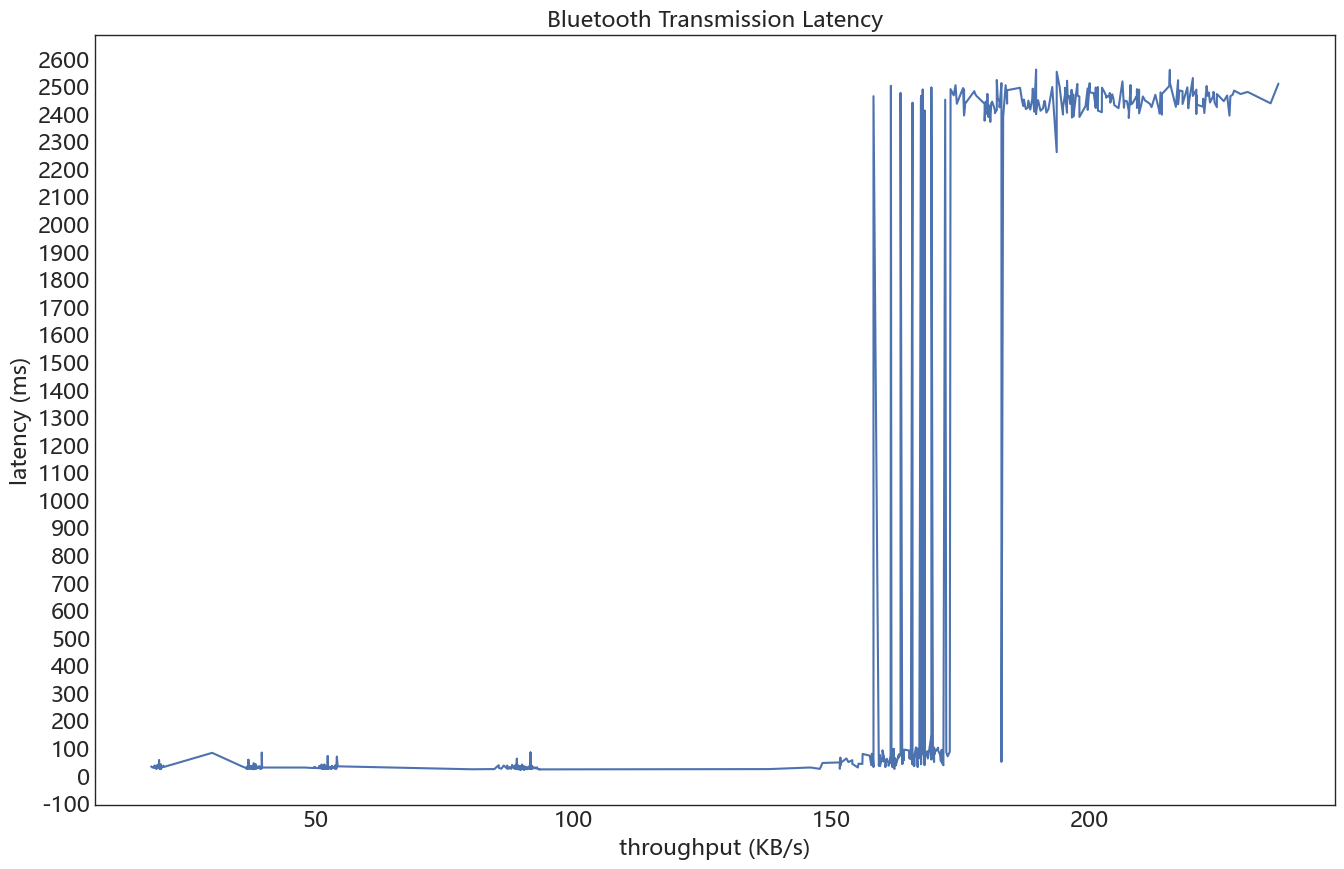

In [5]:
all1 = all1.sort_values(by=['throughput'])
def filter_outliner(raw_data):
    throughput, latency = [], []
    n = len(raw_data)
    raw_throughput, raw_latency = raw_data.throughput.values, raw_data.latency.values
    for i in range(n):
        if raw_throughput[i] > 600:
            continue
        if 150 <= raw_latency[i] <= 2200:
            continue
        if raw_throughput[i] < 120 and raw_latency[i] > 2000:
            continue
        throughput.append(raw_throughput[i])
        latency.append(raw_latency[i])
    return throughput, latency
x_major_locator=MultipleLocator(50)
y_major_locator=MultipleLocator(100)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)


throughput, latency = filter_outliner(all1)
plt.xlabel('throughput (KB/s)')
plt.ylabel('latency (ms)')
plt.title("Bluetooth Transmission Latency")
plt.plot(throughput, latency)
plt.show()

In [6]:
# data = np.array([throughput, latency]).T
# print(data.shape)
# data = pd.DataFrame(data, columns = ['throughput','latency'])
# data = data.rolling(20).mean()
# data = data[~data.isnull()]
# throughput, latency = filter_outliner(data)
# plt.xlabel('throughput')
# plt.ylabel('latency')
# plt.title("latency's tendency with throughput after reduce nan and rolling ")
# plt.plot(throughput, latency)
# plt.show()

In [7]:
# plt.xlabel('throughput')
# plt.ylabel('latency')
# plt.title("latency's tendency with throughput after reduce nan and rolling dot")
# plt.plot(throughput, latency, 'bs')
# plt.show()

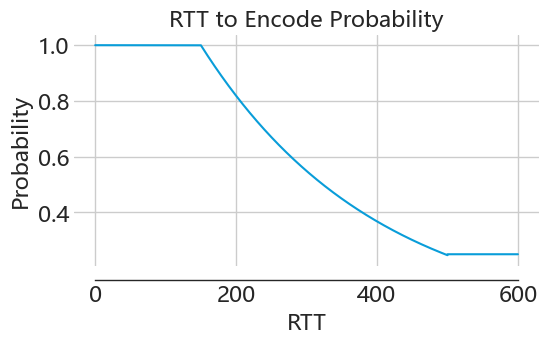

In [8]:
x = np.arange(0, 600, 0.001)
y = []
for i in range(len(x)):
    idx = x[i]
    if 0 <= idx <= 150:
        y.append(1)
    elif 150 < idx <= 500:
        t = math.exp(-1/250*(idx - 150))
        y.append(t)
    else:
        y.append(0.25)
cc = {'x': x, 'y': y}
cc_ = pd.DataFrame(cc)
plt.figure(figsize=(6, 3)) 
sns.lineplot(data=cc_, x="x", y="y",color="#099DD9")
plt.xlabel('RTT')
plt.ylabel('Probability')
plt.title("RTT to Encode Probability")
sns.despine(trim=True, left=True, offset=10)
plt.grid(True)  # 添加网格线

In [9]:
rtt_cc = [297.0, 273.0, 281.0, 251.0, 265.0, 248.0, 222.0, 216.0, 187.0, 187.0, 210.0, 184.0, 219.0, 208.0, 192.0, 194.0, 157.0, 192.0, 287.0, 186.0, 165.0, 197.0, 455.0, 288.0, 322.0, 292.0, 279.0, 312.0, 333.0, 310.0, 258.0, 247.0, 259.0, 259.0, 285.0, 290.0, 317.0, 298.0, 252.0, 239.0, 230.0, 199.0, 201.0, 178.0, 174.0, 206.0, 161.0, 184.0, 209.0, 195.0, 170.0, 296.0, 282.0, 310.0, 201.0, 249.0, 209.0, 205.0, 234.0, 155.0, 302.0, 180.0, 254.0, 254.0, 242.0, 261.0, 203.0, 265.0, 162.0, 179.0, 271.0, 181.0, 144.0, 138.0, 282.0, 216.0, 221.0, 244.0, 288.0, 184.0, 167.0, 284.0, 207.0, 213.0, 173.0, 169.0, 234.0, 222.0, 211.0, 214.0, 336.0, 253.0, 241.0, 176.0, 251.0, 292.0, 187.0, 204.0, 226.0, 173.0, 170.0, 198.0, 153.0, 409.0, 290.0, 301.0, 294.0, 295.0, 167.0, 170.0, 169.0, 245.0, 229.0, 207.0, 294.0, 295.0, 271.0, 262.0, 206.0, 239.0, 224.0, 195.0, 217.0, 209.0, 177.0, 292.0, 181.0, 230.0, 182.0, 258.0, 305.0, 322.0, 201.0, 155.0, 149.0, 151.0, 176.0, 162.0, 207.0, 215.0, 223.0, 146.0, 194.0, 181.0, 334.0, 218.0, 203.0, 193.0, 222.0, 239.0, 241.0, 256.0, 238.0, 265.0, 291.0, 306.0, 314.0, 320.0, 297.0, 268.0, 308.0, 295.0, 298.0, 338.0, 317.0, 313.0, 155.0, 139.0, 166.0, 199.0, 126.0, 131.0, 147.0, 131.0, 212.0, 235.0, 237.0, 336.0, 372.0, 372.0, 428.0, 439.0, 430.0, 477.0, 523.0, 480.0, 478.0, 491.0, 436.0, 492.0, 516.0, 450.0, 458.0, 449.0, 303.0, 253.0, 272.0, 289.0, 446.0, 171.0, 272.0, 269.0, 273.0, 293.0, 283.0, 315.0, 381.0, 366.0, 360.0, 245.0, 208.0, 181.0, 178.0, 176.0, 239.0, 166.0, 150.0, 269.0, 217.0, 207.0, 192.0, 173.0, 164.0, 173.0, 219.0, 274.0, 170.0, 176.0, 204.0, 317.0, 306.0, 324.0, 316.0, 281.0, 267.0, 203.0, 205.0, 261.0, 257.0, 278.0, 257.0, 257.0, 223.0, 211.0, 223.0, 225.0, 202.0, 246.0, 254.0, 286.0, 199.0, 226.0, 168.0, 186.0, 171.0, 258.0, 253.0, 197.0, 182.0, 250.0, 179.0, 246.0, 226.0, 185.0, 170.0, 254.0, 267.0, 262.0, 188.0, 211.0, 323.0, 165.0, 175.0, 230.0, 227.0, 167.0, 197.0, 316.0, 163.0, 150.0, 171.0, 235.0, 215.0, 213.0, 155.0, 144.0, 148.0, 146.0, 147.0, 177.0, 327.0, 324.0, 327.0, 303.0, 256.0, 169.0, 238.0, 192.0, 215.0, 257.0, 207.0, 273.0, 205.0, 217.0, 366.0, 278.0, 350.0, 343.0, 328.0, 327.0, 302.0, 154.0, 146.0, 203.0, 248.0, 156.0, 192.0, 175.0, 177.0, 321.0, 325.0, 306.0, 339.0, 327.0, 325.0, 322.0, 351.0, 355.0, 279.0, 272.0, 223.0, 213.0, 201.0, 155.0, 268.0, 276.0, 232.0, 201.0, 167.0, 261.0, 195.0, 164.0, 143.0, 123.0, 174.0, 204.0, 246.0, 228.0, 215.0, 247.0, 239.0, 238.0, 306.0, 143.0, 241.0, 159.0, 177.0, 233.0, 213.0, 192.0, 156.0, 159.0, 163.0, 167.0, 195.0, 190.0, 205.0, 239.0, 148.0, 138.0, 225.0, 153.0, 151.0, 155.0, 170.0, 224.0, 198.0, 160.0, 429.0, 324.0, 302.0, 267.0, 258.0, 253.0, 239.0, 254.0, 301.0, 318.0, 210.0, 201.0, 252.0, 168.0, 178.0, 394.0, 279.0, 217.0, 240.0, 232.0, 197.0, 190.0, 204.0, 166.0, 166.0, 169.0, 271.0, 221.0, 223.0, 344.0, 236.0, 208.0, 148.0, 142.0, 135.0, 150.0, 159.0, 187.0, 153.0, 158.0, 190.0, 140.0, 212.0, 144.0, 235.0, 227.0, 245.0, 263.0, 158.0, 235.0, 203.0, 174.0, 165.0, 114.0, 276.0, 161.0, 153.0, 158.0, 160.0, 332.0, 276.0, 298.0, 406.0, 412.0, 442.0, 451.0, 468.0, 404.0, 313.0, 439.0, 205.0, 183.0, 245.0, 266.0, 256.0, 201.0, 206.0, 174.0, 161.0, 127.0, 116.0, 167.0, 160.0, 159.0, 167.0, 148.0, 145.0, 244.0, 242.0, 261.0, 236.0, 242.0, 227.0, 220.0, 133.0, 186.0, 138.0, 204.0, 167.0, 167.0, 146.0, 251.0, 239.0, 193.0, 179.0, 137.0, 181.0, 189.0, 128.0, 104.0, 137.0, 288.0, 157.0, 176.0, 186.0, 116.0, 234.0, 244.0, 196.0, 268.0, 301.0, 303.0, 222.0, 309.0, 204.0, 137.0, 153.0, 226.0, 157.0, 167.0, 321.0, 385.0, 393.0, 389.0, 399.0, 420.0, 254.0, 236.0, 217.0, 269.0, 172.0, 151.0, 153.0, 164.0, 295.0, 265.0, 218.0, 229.0, 255.0, 156.0, 172.0, 211.0, 252.0, 211.0, 147.0, 167.0, 162.0, 197.0, 297.0, 219.0, 172.0, 180.0, 282.0, 233.0, 229.0, 181.0, 204.0, 198.0, 157.0, 278.0, 248.0, 244.0, 240.0, 250.0, 201.0, 237.0, 144.0, 144.0, 151.0, 146.0, 187.0, 137.0, 142.0, 138.0, 121.0, 138.0, 99.0, 124.0, 256.0, 249.0, 252.0, 277.0, 282.0, 293.0, 204.0, 217.0, 202.0, 152.0, 160.0, 139.0, 143.0, 146.0, 266.0, 259.0, 205.0, 227.0, 219.0, 225.0, 209.0, 167.0, 152.0, 188.0, 176.0, 134.0, 239.0, 145.0, 233.0, 223.0, 164.0, 135.0, 185.0, 147.0, 118.0, 224.0, 149.0, 123.0, 169.0, 150.0, 123.0, 222.0, 129.0, 206.0, 208.0, 176.0, 212.0, 249.0, 255.0, 274.0, 162.0, 226.0, 142.0, 256.0, 168.0, 123.0, 236.0, 274.0, 242.0, 225.0, 172.0, 174.0, 306.0, 237.0, 173.0, 120.0, 185.0, 96.0, 104.0, 142.0, 166.0, 200.0, 233.0, 225.0, 317.0, 329.0, 179.0, 216.0, 172.0, 175.0, 191.0, 120.0, 229.0, 129.0, 270.0, 238.0, 160.0, 209.0, 207.0, 151.0, 179.0, 199.0, 182.0, 187.0, 199.0, 166.0, 151.0, 215.0, 283.0, 268.0, 237.0, 266.0, 244.0, 239.0, 233.0, 229.0, 157.0, 117.0, 273.0, 183.0, 274.0, 249.0, 241.0, 318.0, 240.0, 140.0, 127.0, 287.0, 176.0, 211.0, 206.0, 160.0, 169.0, 200.0, 165.0, 219.0, 256.0, 385.0, 369.0, 291.0, 244.0, 228.0, 166.0, 161.0, 170.0, 143.0, 162.0, 184.0, 159.0, 203.0, 208.0, 225.0, 251.0, 132.0, 123.0, 236.0, 199.0, 197.0, 148.0, 147.0, 132.0, 113.0, 202.0, 266.0, 286.0, 278.0, 363.0, 297.0, 324.0, 302.0, 263.0, 234.0, 197.0, 217.0, 208.0, 306.0, 177.0, 249.0, 147.0, 120.0, 149.0, 239.0, 240.0, 191.0, 211.0, 198.0, 185.0, 158.0, 176.0, 211.0, 135.0, 219.0, 156.0, 130.0, 201.0, 235.0, 237.0, 195.0, 182.0, 193.0, 245.0, 269.0, 169.0, 192.0, 190.0, 138.0, 177.0, 135.0, 127.0, 136.0, 264.0, 257.0, 286.0, 151.0, 183.0, 228.0, 139.0, 165.0, 140.0, 127.0, 214.0, 147.0, 180.0, 235.0, 177.0, 247.0, 250.0, 178.0, 136.0, 173.0, 121.0, 103.0, 177.0, 158.0, 185.0, 136.0, 131.0, 143.0, 263.0, 281.0, 367.0, 378.0, 346.0, 332.0, 308.0, 227.0, 213.0, 192.0, 223.0, 134.0, 194.0, 187.0, 246.0, 400.0, 233.0, 201.0, 187.0, 214.0, 219.0, 194.0, 246.0, 241.0, 251.0, 268.0, 247.0, 220.0, 159.0, 259.0, 224.0, 126.0, 136.0, 154.0, 178.0, 147.0, 196.0, 197.0, 155.0, 216.0, 146.0, 165.0, 181.0, 311.0, 333.0, 279.0, 305.0, 170.0, 165.0, 170.0, 148.0, 170.0, 180.0, 176.0, 260.0, 178.0, 238.0, 243.0, 205.0, 170.0, 183.0, 160.0, 160.0, 147.0, 140.0, 114.0, 151.0, 190.0, 116.0, 186.0, 149.0, 265.0, 221.0, 167.0, 177.0, 210.0, 161.0, 243.0, 155.0, 182.0, 188.0, 157.0, 272.0, 175.0, 279.0, 251.0, 257.0, 261.0, 303.0, 290.0, 296.0, 360.0, 352.0, 369.0, 252.0, 186.0, 150.0, 222.0, 144.0, 231.0, 353.0, 327.0, 332.0, 301.0, 192.0, 354.0, 151.0, 152.0, 182.0, 220.0, 129.0, 130.0, 122.0, 188.0, 267.0, 229.0, 227.0, 245.0, 248.0, 251.0, 253.0, 248.0, 221.0, 268.0, 142.0, 119.0, 151.0, 247.0, 244.0, 237.0, 231.0, 260.0, 276.0, 228.0, 233.0, 224.0, 343.0, 231.0, 269.0, 284.0, 347.0, 306.0, 351.0, 290.0, 246.0, 265.0, 167.0, 135.0, 185.0, 164.0, 188.0, 197.0, 177.0, 156.0, 179.0, 155.0, 147.0, 200.0, 242.0, 266.0, 216.0, 263.0, 142.0, 117.0, 167.0, 169.0, 192.0, 208.0, 169.0, 154.0, 243.0, 150.0, 252.0, 331.0, 292.0, 271.0, 350.0, 195.0, 238.0, 243.0, 228.0, 197.0, 170.0, 168.0, 164.0, 209.0, 168.0, 262.0, 272.0, 234.0, 241.0, 226.0, 191.0, 190.0, 214.0, 200.0, 183.0, 195.0, 167.0, 263.0, 178.0, 231.0, 259.0, 245.0, 238.0, 200.0, 204.0, 165.0, 147.0, 230.0, 212.0, 197.0, 217.0, 252.0, 189.0, 258.0, 244.0, 149.0, 232.0, 155.0, 164.0, 115.0, 133.0, 120.0, 111.0, 120.0, 
]
print(len(rtt_cc))

1020


In [10]:
rtt_ccfr = [26.315789473684212, 17.543859649122805, 20.27027027027027, 16.46090534979424, 18.050541516245485, 18.92744479495268, 19.23076923076923, 16.736401673640167, 16.574585635359114, 16.39344262295082, 15.58073654390935, 15.056461731493098, 15.011547344110854, 14.957264957264956, 15.274949083503055, 15.340364333652925, 15.04424778761062, 15.477214101461737, 15.820149875104079, 14.61988304093567, 14.522821576763485, 14.84480431848853, 15.052356020942408, 13.47557551937114, 13.579576317218903, 13.598326359832637, 13.88888888888889, 14.162873039959534, 14.384920634920634, 14.513788098693757, 14.445479962721343, 14.499320344358859, 14.705882352941176, 14.80836236933798, 15.002143163309043, 15.132408575031526, 15.30190239867659, 15.29175050301811, 15.139751552795031, 15.343306482546987, 15.50680786686838, 15.526802218114602, 15.473191795609932, 15.347052668294385, 15.447991761071062, 15.519568151147098, 15.289525048796357, 15.32567049808429, 15.40880503144654, 15.188335358444716, 15.201192250372578, 15.370972509606858, 15.229885057471265, 14.814814814814815, 14.508045370614614, 14.667365112624411, 14.679371619881534, 14.709611970580776, 14.779559118236474, 14.644862094215277, 14.468690702087287, 14.139110604332954, 14.234071396294622, 14.272970561998216, 14.390081912773963, 14.47685896029831, 14.436543848308554, 14.30976430976431, 14.081632653061224, 14.213197969543147, 14.317402702157693, 14.067995310668229, 14.139066434243656, 14.236244709503653, 14.343086632243258, 14.232209737827716, 14.27247451343837, 14.385835485060865, 14.463566459172466, 14.237408791599929, 14.245515300738656, 14.313143655088147, 14.156575132184887, 14.174822814714815, 14.042623492483067, 14.052287581699346, 14.041316978695933, 13.86481802426343, 13.952030098761563, 14.040561622464898, 14.128240956373235, 13.975391159046028, 14.027149321266968, 13.847967000589275, 13.848396501457726, 13.86481802426343, 13.68510158013544, 13.750526168093167, 13.8268156424581, 13.713658804168952, 13.754596214081438, 13.728129205921938, 13.71139510117146, 13.747521480502312, 13.592233009708739, 13.658033758536272, 13.700384122919335, 13.714285714285714, 13.552157155290315, 13.607125185551707, 13.68005915701257, 13.749079302725262, 13.760350706283488, 13.798111837327523, 13.870461946689181, 13.870620590697119, 13.772807533843439, 13.799555607531282, 13.7429264349232, 13.725265927027335, 13.703284258210646, 13.663344159480344, 13.70320855614973, 13.735046521931768, 13.743815283122593, 13.732970027247955, 13.593064326233543, 13.651877133105803, 13.624841571609632, 13.596904089530383, 13.49680609932001, 13.542628501077255, 13.392407612526434, 13.316108516347013, 13.355757815591609, 13.37924249877029, 13.384134427510746, 13.428043203269437, 13.445540723544207, 13.491375156596318, 13.555085560469141, 13.518659558263519, 13.564788465186872, 13.610586011342155, 13.604803903171327, 13.507262466463134, 13.558384061981183, 13.60919540229885, 13.660951682405795, 13.706140350877192, 13.767323121808898, 13.800617396041403, 13.829883395100786, 13.886384129846709, 13.948884089272857, 14.006105225354641, 14.044189999105464, 14.09707351891506, 14.103246407663653, 14.124293785310735, 14.17004048582996, 14.226749802406252, 14.275705027150115, 14.321893284429306, 14.327891629037861, 14.340013821700069, 14.165747730935617, 14.185594866165667, 14.229182453481519, 14.271323035594358, 14.25593997498958, 14.303534303534303, 14.359229747675963, 14.382542569019671, 14.43298969072165, 14.472494038319217, 14.521289687423087, 14.566284779050736, 14.599135470190035, 14.64367068011715, 14.690366041717393, 14.741616717965332, 14.76640038731542, 14.817200837493962, 14.865407794294898, 14.890721319349932, 14.91109161948808, 14.947920807823806, 14.946619217081851, 14.968880485306862, 15.007464445666692, 14.968425976455913, 15.015949583754766, 15.045757716767488, 14.908256880733944, 14.900410521514369, 14.935557240333587, 14.972776769509982, 15.007541478129713, 14.721036360959811, 14.751210920299428, 14.770400701959638, 14.734702765478698, 14.731369150779896, 14.757756820963214, 14.799913786909979, 14.829142488716958, 14.833832548851804, 14.865922185077176, 14.76274165202109, 14.74081318988403, 14.765287644518734, 14.797832430179241, 14.833298676093436, 14.80512326125878, 14.770240700218817, 14.776983316309158, 14.80575930453681, 14.787305874409183, 14.827795376423806, 14.842175957018132, 14.87536853390512, 14.903428456860256, 14.939309056956116, 14.981024036220786, 14.940173200237984, 14.844363065655244, 14.875709532198082, 14.91079567652038, 14.916661262079252, 14.914772727272728, 14.939790070191256, 14.978143481614811, 14.950166112956811, 14.976738257599898, 14.948061819103117, 14.971572962728995, 14.986461809709716, 15.004080607696654, 15.019713373803118, 15.054032106939847, 15.075063850993583, 15.074441687344912, 15.099944303484127, 15.115992102665352, 15.144053188869737, 15.15895421627593, 15.158924205378973, 15.183852673943532, 15.217920623326028, 15.130508168063175, 15.15515997113303, 15.142446732104382, 15.183214776735012, 15.204817840319599, 15.23900232156676, 15.257658513417239, 15.238320240978087, 15.229023343329215, 15.239434968641932, 15.169127048703942, 15.195452963693306, 15.211104684788896, 15.17939282428703, 15.194082908090133, 15.230460921843688, 15.251913629612703, 15.276748560679474, 15.231300605854708, 15.246484838217855, 15.275350882137422, 15.142236820130266, 15.16077081135114, 15.185944687690517, 15.196728558797524, 15.169836209739476, 15.143232013995188, 15.158950869731175, 15.047732053287309, 15.052144930652618, 15.074298589131486, 15.102827763496144, 15.05399223362945, 15.043966521877318, 15.003158559696779, 14.999737766822259, 15.022245485475006, 15.025825637814993, 15.048164540484251, 15.07198170573255, 15.094926859632743, 15.071745638484568, 15.075118337106401, 15.092402464065708, 15.074863304205632, 15.021568129916266, 15.022001922006979, 14.968856741008638, 14.994984954864593, 15.01877346683354, 14.999003388479169, 14.97347414348753, 14.918759231905467, 14.945919370698132, 14.967855915983709, 14.923917284432305, 14.921745892874501, 14.920311970159375, 14.923931417531998, 14.887384142534698, 14.875400583536614, 14.781125639567936, 14.794157961903862, 14.823907090926259, 14.842387975309807, 14.796778422925641, 14.828328187856675, 14.843166542195668, 14.871101580345904, 14.891339755223603, 14.919129949804798, 14.933679621556442, 14.963402205132958, 14.965357967667437, 14.98179136126861, 15.007135294388437, 15.028954867175292, 15.053467345908485, 15.015289124184198, 15.028006739833327, 15.005893553359325, 15.028064457722254, 15.006083547384076, 14.991023339317772, 15.004926990952253, 15.012063265123759, 15.02854084909026, 15.024893314366999, 15.027261846713063, 15.016341312604894, 14.989669875598928, 14.990795125799947, 15.005687286726747, 15.028396679772825, 15.045791539467945, 15.027797081306462, 15.047049130566759, 15.053856469265043, 15.067783438390467, 15.055706112616681, 15.071492979518226, 15.093045193379641, 15.111301369863014, 15.017180672803631, 15.03663857003685, 15.010330142935448, 15.02651738361815, 15.0439130982897, 15.027208036835496, 14.989382520714495, 14.968694282041712, 14.983443708609272, 14.98885126765216, 15.005977655934368, 15.01748611396832, 15.035123033315532, 15.063826293970365, 15.077641660179456, 15.029325513196481, 15.043708070746087, 15.064154620756861, 15.028481396194401, 15.026992184352592, 15.045458202590716, 15.046342735625728, 15.046018407362945, 15.062527468136961, 15.044776119402986, 15.0450557738875, 14.999013222814288, 15.01596184920979, 15.024582104228122, 15.023142700243195, 15.035827557852695, 15.05435207632752, 15.043454538368604, 15.034380948681093, 15.06094247341045, 15.02394562026881, 15.034115878339309, 15.022860875244938, 14.995027159360417, 15.018916956471891, 15.033003929947728, 14.981983690498769, 14.976740667902122, 14.996411438068977, 15.020001509547889, 15.01806684733514, 15.034202811395925, 15.013103706476974, 15.013444876008366, 15.031143933460147, 15.037034279971712, 15.038431547287512, 15.032582938388627, 15.032317636195753, 15.05423953951738, 15.014684287812042, 15.022166855970395, 15.015344147303814, 15.016218974377665, 15.032394263667467, 15.031588119962239, 15.032963848438744, 15.032703357062841, 15.031902238563859, 15.048421355797961, 15.066522833513126, 15.050526768436896, 15.065306852746467, 15.048318653496416, 15.04963176432917, 15.065913370998116, 15.081618168914124, 15.069510771516503, 15.030977189524076, 15.047639137924971, 15.052103434967194, 15.025508421273326, 15.031562794266383, 15.030269292324821, 15.049353538162103, 14.998099319210699, 15.005691814136396, 15.029300241296104, 15.048209366391186, 15.055685411797059, 15.038366675801589, 15.055087935399987, 15.068680379963098, 15.085324232081911, 15.109140518417462, 15.115408184108396, 15.132451457136057, 15.111984549181715, 15.077410867878706, 15.071995693715516, 14.970658842357961, 14.97803221941153, 14.979407466454099, 14.94412484295444, 14.927340429037466, 14.912626461700171, 14.923904487011283, 14.922930915993064, 14.940011115106739, 14.940466481813733, 14.955037143229506, 14.974445782740323, 14.986996098829648, 15.002435460301996, 15.020275750202758, 15.023960626861806, 15.034919813760993, 15.037108744756374, 15.05189196158061, 15.071978358184923, 15.068757229147925, 15.058310906061772, 15.06814255550579, 15.083245454254946, 15.055543177260718, 15.035685963521015, 15.024038461538462, 15.034269290294052, 15.020310482728217, 15.022942988245646, 15.035941865210159, 15.042777899652137, 15.043472821667605, 15.022596228767336, 15.036423634891975, 15.027788989971125, 15.049025691944891, 15.038059285846897, 15.02344521224087, 15.036203974734248, 15.050784856879039, 15.06440803025179, 15.01988375650046, 15.02060754083346, 15.027738828263123, 15.01200352508585, 15.030972913883152, 15.051740357478833, 15.041917617505526, 15.057599854866508, 15.076895186874943, 15.08659706716553, 15.034660744830898, 15.004333921152524, 14.94266531994534, 14.938644851502756, 14.958973903255428, 14.965986394557822, 14.952223664032086, 14.969354078264969, 14.98116317400518, 15.0, 15.012191897529304, 15.01070098800903, 15.024601686972822, 15.045076688912305, 14.988794784481504, 14.997820084290074, 15.010306883837066, 14.997104806022003, 14.967987541097076, 14.98170503327667, 14.996689790161481, 15.01596525040992, 15.026576641287171, 15.011315781934856, 15.004286939125464, 15.02384964725372, 15.043388901575703, 15.02432916939362, 15.025421081035022, 15.022675736961451, 15.04206679697459, 15.029946886653859, 15.015776425512733, 15.025746363150342, 15.023447811069614, 15.027896935542659, 15.035699286014278, 15.014512167894619, 15.009328617972209, 15.025041736227045, 15.027777777777779, 15.014266323166849, 15.024487424255001, 15.000689369915897, 15.010879444735174, 15.021872506671802, 15.0216949524908, 15.031406862879557, 15.043981037459238, 15.01337555276519, 15.024677555694925, 15.026132404181185, 15.025132454829507, 15.00948252506096, 14.982587803363659, 14.99662845583277, 15.004175309107563, 15.022614688778807, 15.030518136108197, 15.02387723346032, 15.026114905584572, 15.044034585218299, 15.043018222625982, 15.050434968244652, 15.056628914057296, 15.073637114170817, 15.081391637408236, 15.082715951034281, 15.037792695174163, 15.016597291743507, 15.022757767897076, 15.02219187435985, 14.983525966215158, 14.968186085323877, 14.957209374918712, 14.952106533759052, 14.965245357402221, 14.977973568281937, 14.989903174027857, 15.006468305304011, 15.015635903134935, 15.03099173553719, 15.017645088998224, 15.019030963892604, 15.029673971687691, 15.032193520252418, 15.020855190767419, 15.015705201869302, 15.01899686360507, 15.029166772804851, 15.020204844079599, 15.018138461148178, 15.028638045516752, 15.00340986587861, 15.015772870662461, 15.019782767571384, 15.006786989090545, 15.016824870674501, 15.029104777197912, 15.01877346683354, 15.027629835221163, 15.029709891646277, 15.01643589999004, 15.017030904253998, 15.02881558028617, 15.030134675959225, 15.038525382156926, 15.04168625219564, 15.018495684340321, 15.017232890201871, 15.02853207398662, 15.039441673015016, 15.051440076607657, 15.06267939062385, 15.077594449483929, 15.087315388571849, 15.064947748803593, 15.074273727345904, 15.05423415535775, 15.062802167099925, 15.028314215188034, 15.028510679423988, 15.039953648938994, 15.004328171587957, 15.015736491843453, 15.00911096192577, 15.00394840747565, 15.008842789541609, 15.009425632949151, 14.991076740035693, 14.979939700401207, 14.973819508612316, 14.976931267005796, 14.962005003067919, 14.977474821331699, 14.990454191906098, 14.989293361884368, 14.996944196323632, 15.011981393600525, 15.019948368927482, 15.033890752163614, 15.04887367853543, 15.007935766968536, 15.012004941840136, 15.009773806199386, 15.02081056572186, 15.019616036399936, 15.007990365240753, 15.02140955907881, 14.997000599880025, 15.01176036526311, 15.01197273899429, 15.000804024718018, 15.00895029145821, 14.997481339011768, 14.989831592898112, 14.997945486919601, 14.990659315624004, 14.997724169321803, 15.009210197166443, 15.020678998318411, 15.02257925431729, 15.032309261988438, 15.04202251772648, 15.030966050359387, 15.041669489802832, 15.042850699142985, 15.054199625898633, 15.064513949875026, 15.076846913746934, 15.087466834555022, 15.078759592514473, 15.06435366536094, 15.062462287974613, 15.0750402001072, 15.052326875974172, 15.055150329122931, 15.064658045593921, 15.073480442214626, 15.064244572441293, 15.055047088473271, 15.032290771231457, 15.042064925340263, 15.051823163083425, 15.020612226997631, 15.019157088122606, 15.020661608763145, 15.013638843426076, 15.02824612297424, 15.02024467760895, 15.014232014427568, 15.02453428286074, 15.019831379093608, 15.02977801840823, 15.03450364505592, 15.018773466833542, 15.018638626128553, 15.024969863957292, 15.019338203695746, 15.015981294377589, 15.013600051401768, 15.012510425354462, 15.013668204339655, 15.016103918264616, 15.01565461864497, 15.023833844058563, 15.02912291144084, 15.043345232024476, 15.057234480854587, 15.027091093802913, 15.034573174599819, 15.04553811043256, 15.023177412557944, 15.018299608766984, 15.005561501815357, 15.006392387818833, 15.013820252952508, 15.016208302833839, 15.024553338209175, 15.023474178403756, 15.033988072897118, 15.043547110055425, 15.046513079852655, 15.044781081811193, 15.055237145942355, 15.063803299097417, 15.062050676445605, 15.069343821155039, 15.066964285714286, 15.075791995374004, 15.084294587400178, 15.093717137142503, 15.04577363602775, 15.05455738780868, 15.022687323713363, 15.023474178403756, 15.033453002610965, 15.04035216434336, 15.051836161068904, 15.051051539681895, 15.064343654068999, 15.071804350917105, 15.083844248649966, 15.085769901455858, 15.093192868719612, 15.098158267557176, 15.08329126703685, 15.034571474513587, 15.013931485156453, 15.013211626231083, 15.023004600920183, 15.027377003317213, 15.030840170070064, 15.032197611595128, 15.037444231994902, 15.048968866948007, 15.058982673218088, 15.052226061400374, 15.02315822809865, 15.029861962583553, 15.01726689689196, 15.017145559891215, 15.017615682878343, 15.011887685929302, 15.01737303939852, 15.027563612108372, 15.037741397902165, 15.045548045841903, 15.046568051968382, 15.011794981771391, 15.016360236833904, 15.02676399026764, 15.009708737864077, 15.017170796065269, 15.010943462007788, 15.01693275278181, 15.027269562526591, 15.01727565772965, 15.018894115832497, 15.01906265644857, 15.0099938499385, 15.016225973078328, 15.025906735751295, 15.014842478215071, 15.009273245253436, 15.017482183457842, 15.0162182789544, 15.010667479427003, 15.0171298058622, 15.007028608335549, 15.012336306699565, 15.005968282839765, 15.016948510614123, 15.025926346466825, 15.032617944596767, 15.044415044415045, 15.055063374827633, 15.05745608241976, 15.047364357144204, 15.054006247412591, 15.053561360646494, 15.026042642485104, 15.034356218756436, 15.020456965643506, 15.015855250886029, 14.999255620068483, 15.006694436179707, 15.007986923734165, 15.015683872524454, 15.0158500639564, 14.978852298542748, 14.978786201807784, 14.984241664669996, 14.995762867985706, 15.004786803151925, 15.002757859900717, 15.01534616162173, 15.011102343420255, 14.993135011441648, 15.00539828352883, 15.010787289282188, 15.011779315886553, 15.007020295034737, 15.01184186554928, 15.011463299246698, 14.997458057956278, 14.974830695686814, 14.98452684727727, 14.995025775526816, 14.9949414655297, 15.002437219042806, 15.011818198220954, 15.006845860056208, 15.017015683238203, 15.005301274102827, 15.011671754354463, 15.012914334911752, 15.01980535192587, 15.021574490179578, 15.021996494867485, 15.022149185481565, 14.987006514542024, 14.993063707181731, 15.002310782466493, 15.011280666536392, 15.018906779811465, 15.028655582959242, 15.036527413291722, 15.032135838099117, 15.019259992225324, 15.0231260812767, 15.003698094600782, 15.003078005452467, 15.001141773085774, 14.969011520011204, 14.968175141638106, 14.976495465110183, 14.977742864624249, 14.985258971093627, 14.988061834469057, 14.998954776670613, 15.005135168067957, 14.996958901729082, 15.008337965536409, 15.004336513443192, 15.01126711735136, 15.01142738416788, 15.006915629322268, 15.017194601413587, 15.019940265524921, 15.008443326325947, 15.010672726020795, 14.989697802197801, 15.001201469225224, 15.009091220968129, 15.01568419067862, 15.019180709686257, 14.997523188083973, 15.00717066174964, 14.985100042571307, 14.989876303744916, 14.990821945747502, 14.998131603084554, 15.007724564113882, 15.015524525356724, 15.008808781677734, 15.01481168006771, 15.024872254746032, 14.997891185153945, 14.992756308749705, 14.989905787348587, 14.998150452298484, 14.983221476510067, 14.988934343773053, 14.998407990213328, 15.005861664712778, 15.014059989287627, 15.015466934202825, 14.993078834575808, 14.99825020414285, 14.957584209040954, 14.958292565629094, 14.96519721577726, 14.973580905371607, 14.958677685950413, 14.965559391466657, 14.972432236125325, 14.982262189588319, 14.981211681719296, 14.982383351443907, 14.98922289681952, 14.997040057883313, 14.992528367571474, 14.998605162539588, 14.989433677899186, 14.998198906244884, 14.994685634862234, 15.005639374274645, 14.982067166612325, 14.961295778312627, 14.972201450076405, 14.981638555783043, 14.988632672945762, 14.988807059663237, 14.997730073286204, 15.004212845939465, 15.015306866222849, 15.014723489628839, 15.022153229196986, 15.025931850128448, 15.015402480525136, 14.994288656144924, 15.00482470247668, 15.01414609053498, 15.02249357326478, 15.02793654871235, 15.015063136978398, 14.998880680546229, 14.989703558258704, 14.997766290127002, 14.982167876703604, 14.985920870519735, 14.996103875451235, 15.002224906236094, 15.010960383772279, 15.020879975864972, 15.025306614625478, 15.019963242284048, 15.018199082133249, 15.0138285262742, 15.012075960157224, 15.018378583034911, 15.025383911960395, 15.012274186441745, 15.003692007981021, 14.997019420826405, 14.9723082699709, 14.9790480955657, 14.988122030507627, 14.994377108584281, 15.002732027164154, 15.01178159574302, 15.011223344556678, 15.017213714891032, 15.025301673803037, 15.012354888339784, 15.016927042892194, 15.02638932008693, 15.018598884066957, 15.024550425179287, 15.020496558125146, 14.986123959296947, 14.993450959241853, 14.995458254430126, 15.002077210690711, 15.00199821697562, 15.001919385796546, 15.0098991666283, 15.009352098856285, 15.015705201869302, 15.013544328981805, 15.017816452308493, 15.019787003223982, 15.01098364657066, 15.01730420332058, 15.023159434422231, 15.015745995040394, 15.020447876917464, 15.017386154850662, 15.005911419650165, 15.015379020894256, 15.022336639660788, 15.023829336561011, 15.025319325825713, 15.01342909738359, 15.020358920223194, 15.010764991945077, 15.003232159232699, 15.00969094159893, 15.006002400960384, 15.01560062402496, 15.0159600773277, 15.020816485458411, 15.023417977225458, 15.023768947887701, 15.027036716159293, 15.034563072007645, 15.041857550027606, 15.031209498413457, 15.027302078528813, 15.035022232797466, 15.015505141178389, 15.016528558087133, 15.012658602667928, 15.015459265943756, 15.013594987587187, 14.993807866957598, 14.998379349972009, 15.007584795063256, 15.013246982631735, 15.020669971900608, 15.01461794996107, 15.020482476103778, 15.027883768711476, 15.02910514508585, 15.021522063775583]
print(len(rtt_ccfr))

1026


In [11]:
rtt = [379.0, 429.0, 366.0, 358.0, 370.0, 375.0, 448.0, 374.0, 253.0, 233.0, 242.0, 162.0, 170.0, 296.0, 176.0, 244.0, 244.0, 243.0, 191.0, 411.0, 322.0, 269.0, 240.0, 281.0, 315.0, 270.0, 271.0, 235.0, 217.0, 214.0, 237.0, 236.0, 279.0, 284.0, 364.0, 397.0, 446.0, 439.0, 481.0, 452.0, 413.0, 409.0, 411.0, 381.0, 342.0, 299.0, 357.0, 348.0, 292.0, 253.0, 229.0, 246.0, 209.0, 194.0, 223.0, 175.0, 156.0, 182.0, 213.0, 257.0, 223.0, 250.0, 265.0, 213.0, 249.0, 234.0, 232.0, 266.0, 223.0, 224.0, 219.0, 265.0, 299.0, 315.0, 338.0, 313.0, 320.0, 333.0, 309.0, 325.0, 356.0, 367.0, 372.0, 370.0, 376.0, 442.0, 424.0, 343.0, 373.0, 359.0, 352.0, 341.0, 349.0, 365.0, 357.0, 407.0, 400.0, 410.0, 477.0, 449.0, 445.0, 451.0, 442.0, 440.0, 439.0, 458.0, 479.0, 485.0, 489.0, 501.0, 535.0, 561.0, 571.0, 593.0, 555.0, 519.0, 538.0, 495.0, 488.0, 461.0, 496.0, 480.0, 481.0, 503.0, 527.0, 504.0, 453.0, 437.0, 433.0, 422.0, 422.0, 426.0, 409.0, 414.0, 415.0, 397.0, 345.0, 328.0, 363.0, 333.0, 340.0, 351.0, 375.0, 363.0, 364.0, 332.0, 288.0, 234.0, 253.0, 240.0, 324.0, 259.0, 148.0, 236.0, 203.0, 216.0, 243.0, 274.0, 317.0, 323.0, 334.0, 318.0, 337.0, 324.0, 337.0, 359.0, 349.0, 378.0, 382.0, 255.0, 273.0, 251.0, 255.0, 240.0, 183.0, 201.0, 193.0, 158.0, 173.0, 162.0, 167.0, 182.0, 179.0, 194.0, 226.0, 160.0, 158.0, 175.0, 182.0, 183.0, 218.0, 184.0, 171.0, 177.0, 197.0, 252.0, 215.0, 226.0, 203.0, 227.0, 229.0, 236.0, 270.0, 353.0, 227.0, 212.0, 209.0, 246.0, 223.0, 236.0, 210.0, 195.0, 212.0, 233.0, 237.0, 267.0, 304.0, 293.0, 287.0, 282.0, 281.0, 264.0, 305.0, 300.0, 295.0, 317.0, 333.0, 306.0, 319.0, 278.0, 224.0, 183.0, 284.0, 282.0, 196.0, 194.0, 163.0, 178.0, 195.0, 142.0, 176.0, 208.0, 226.0, 231.0, 214.0, 228.0, 232.0, 271.0, 275.0, 207.0, 225.0, 286.0, 205.0, 230.0, 184.0, 210.0, 172.0, 161.0, 206.0, 170.0, 183.0, 165.0, 336.0, 227.0, 253.0, 232.0, 191.0, 225.0, 213.0, 170.0, 159.0, 210.0, 209.0, 157.0, 271.0, 215.0, 258.0, 294.0, 304.0, 259.0, 247.0, 287.0, 290.0, 315.0, 322.0, 217.0, 261.0, 242.0, 245.0, 256.0, 236.0, 235.0, 279.0, 263.0, 274.0, 251.0, 311.0, 276.0, 285.0, 224.0, 170.0, 131.0, 121.0, 226.0, 142.0, 167.0, 175.0, 229.0, 275.0, 284.0, 300.0, 303.0, 297.0, 287.0, 294.0, 292.0, 310.0, 320.0, 272.0, 292.0, 296.0, 351.0, 327.0, 197.0, 241.0, 226.0, 121.0, 159.0, 170.0, 191.0, 175.0, 200.0, 170.0, 165.0, 164.0, 159.0, 248.0, 213.0, 182.0, 237.0, 216.0, 219.0, 238.0, 288.0, 309.0, 301.0, 153.0, 128.0, 123.0, 165.0, 171.0, 176.0, 222.0, 198.0, 179.0, 232.0, 181.0, 203.0, 202.0, 178.0, 183.0, 175.0, 164.0, 128.0, 262.0, 264.0, 232.0, 221.0, 260.0, 152.0, 206.0, 227.0, 224.0, 218.0, 224.0, 161.0, 157.0, 184.0, 188.0, 203.0, 278.0, 255.0, 257.0, 198.0, 195.0, 188.0, 210.0, 189.0, 173.0, 356.0, 164.0, 169.0, 235.0, 150.0, 207.0, 241.0, 151.0, 168.0, 210.0, 438.0, 243.0, 155.0, 142.0, 241.0, 153.0, 207.0, 264.0, 170.0, 199.0, 219.0, 188.0, 186.0, 171.0, 208.0, 178.0, 190.0, 290.0, 223.0, 159.0, 186.0, 191.0, 230.0, 210.0, 183.0, 196.0, 188.0, 234.0, 287.0, 204.0, 209.0, 202.0, 175.0, 170.0, 139.0, 286.0, 142.0, 149.0, 217.0, 281.0, 248.0, 259.0, 269.0, 268.0, 241.0, 201.0, 204.0, 216.0, 200.0, 219.0, 238.0, 240.0, 200.0, 232.0, 216.0, 209.0, 191.0, 206.0, 164.0, 219.0, 215.0, 189.0, 250.0, 239.0, 140.0, 121.0, 213.0, 167.0, 193.0, 220.0, 214.0, 225.0, 281.0, 159.0, 289.0, 181.0, 147.0, 162.0, 187.0, 145.0, 161.0, 191.0, 200.0, 343.0, 245.0, 230.0, 244.0, 129.0, 136.0, 202.0, 250.0, 217.0, 133.0, 427.0, 159.0, 289.0, 181.0, 216.0, 241.0, 190.0, 221.0, 204.0, 177.0, 155.0, 160.0, 170.0, 171.0, 167.0, 229.0, 223.0, 183.0, 232.0, 279.0, 308.0, 361.0, 319.0, 216.0, 294.0, 183.0, 183.0, 226.0, 178.0, 174.0, 156.0, 209.0, 157.0, 252.0, 268.0, 213.0, 203.0, 194.0, 204.0, 220.0, 199.0, 153.0, 191.0, 143.0, 236.0, 174.0, 249.0, 250.0, 223.0, 280.0, 336.0, 236.0, 251.0, 208.0, 179.0, 148.0, 223.0, 156.0, 141.0, 300.0, 187.0, 189.0, 204.0, 233.0, 389.0, 217.0, 210.0, 187.0, 205.0, 154.0, 138.0, 244.0, 346.0, 299.0, 253.0, 255.0, 259.0, 269.0, 251.0, 256.0, 375.0, 353.0, 378.0, 393.0, 394.0, 405.0, 342.0, 346.0, 299.0, 306.0, 298.0, 311.0, 313.0, 489.0, 199.0, 191.0, 199.0, 179.0, 223.0, 302.0, 163.0, 120.0, 143.0, 128.0, 220.0, 152.0, 277.0, 256.0, 229.0, 162.0, 153.0, 255.0, 238.0, 228.0, 212.0, 172.0, 329.0, 156.0, 146.0, 178.0, 182.0, 142.0, 246.0, 137.0, 217.0, 192.0, 123.0, 176.0, 201.0, 194.0, 195.0, 232.0, 238.0, 283.0, 206.0, 262.0, 210.0, 211.0, 230.0, 129.0, 252.0, 183.0, 282.0, 183.0, 186.0, 189.0, 212.0, 224.0, 215.0, 232.0, 207.0, 188.0, 233.0, 221.0, 391.0, 275.0, 297.0, 305.0, 262.0, 265.0, 236.0, 179.0, 193.0, 212.0, 256.0, 206.0, 243.0, 280.0, 268.0, 328.0, 311.0, 285.0, 210.0, 232.0, 183.0, 251.0, 148.0, 179.0, 214.0, 225.0, 216.0, 186.0, 177.0, 221.0, 387.0, 166.0, 173.0, 170.0, 201.0, 184.0, 234.0, 233.0, 250.0, 232.0, 380.0, 148.0, 114.0, 318.0, 201.0, 216.0, 257.0, 284.0, 324.0, 313.0, 360.0, 356.0, 344.0, 330.0, 371.0, 392.0, 401.0, 219.0, 332.0, 286.0, 270.0, 236.0, 265.0, 282.0, 277.0, 197.0, 186.0, 326.0, 237.0, 221.0, 336.0, 214.0, 245.0, 175.0, 141.0, 217.0, 241.0, 183.0, 188.0, 179.0, 180.0, 247.0, 270.0, 254.0, 211.0, 223.0, 259.0, 336.0, 218.0, 224.0, 198.0, 224.0, 229.0, 263.0, 282.0, 264.0, 245.0, 367.0, 397.0, 344.0, 300.0, 339.0, 333.0, 389.0, 392.0, 338.0, 318.0, 263.0, 272.0, 267.0, 289.0, 418.0, 287.0, 309.0, 290.0, 285.0, 190.0, 180.0, 182.0, 207.0, 264.0, 214.0, 184.0, 180.0, 239.0, 316.0, 291.0, 244.0, 194.0, 240.0, 206.0, 145.0, 167.0, 223.0, 185.0, 151.0, 182.0, 176.0, 202.0, 208.0, 172.0, 174.0, 174.0, 183.0, 188.0, 204.0, 221.0, 184.0, 188.0, 255.0, 173.0, 163.0, 204.0, 164.0, 285.0, 234.0, 216.0, 198.0, 219.0, 247.0, 203.0, 182.0, 180.0, 194.0, 190.0, 150.0, 186.0, 131.0, 285.0, 250.0, 388.0, 232.0, 219.0, 159.0, 267.0, 218.0, 310.0, 199.0, 172.0, 430.0, 249.0, 236.0, 189.0, 211.0, 243.0, 244.0, 276.0, 281.0, 249.0, 230.0, 303.0, 276.0, 245.0, 217.0, 249.0, 263.0, 272.0, 204.0, 183.0, 287.0, 211.0, 216.0, 177.0, 141.0, 152.0, 240.0, 198.0, 246.0, 175.0, 197.0, 202.0, 154.0, 317.0, 281.0, 297.0, 308.0, 354.0, 314.0, 305.0, 313.0, 311.0, 329.0, 340.0, 358.0, 308.0, 226.0, 166.0, 185.0, 192.0, 312.0, 183.0, 206.0, 228.0, 221.0, 209.0, 332.0, 288.0, 261.0, 275.0, 267.0, 267.0, 253.0, 288.0, 319.0, 425.0, 217.0, 279.0, 243.0, 257.0, 195.0, 330.0, 172.0, 216.0, 224.0, 346.0, 185.0, 149.0, 228.0, 338.0, 263.0, 257.0, 243.0, 225.0, 197.0, 237.0, 179.0, 165.0, 182.0, 283.0, 218.0, 220.0, 169.0, 369.0, 286.0, 274.0, 198.0, 233.0, 247.0, 265.0, 185.0, 196.0, 211.0, 224.0, 194.0, 197.0, 257.0, 214.0, 294.0, 266.0, 258.0, 258.0, 306.0, 329.0, 321.0, 292.0, 288.0, 244.0, 223.0, 209.0, 230.0, 382.0, 195.0, 207.0, 224.0, 166.0, 142.0, 173.0, 196.0, 206.0, 208.0, 210.0, 292.0, 141.0, 144.0, 239.0, 196.0, 232.0, 242.0, 236.0, 246.0, 199.0, 148.0, 151.0, 212.0, 206.0, 197.0, 191.0, 334.0, 183.0, 150.0, 135.0, 297.0, 265.0, 261.0, 185.0, 178.0, 216.0, 197.0, 217.0, 236.0, 251.0, 271.0, 275.0, 243.0, 242.0, 229.0, 362.0, 158.0, 159.0, 141.0, 190.0, 193.0, 192.0, 198.0, 222.0, 279.0, 165.0, 179.0]
print(len(rtt))

1004


In [12]:
rtt_fr = [7.936507936507937, 9.569377990430622, 7.263922518159807, 8.064516129032258, 8.012820512820513, 8.438818565400844, 9.032258064516128, 8.565310492505352, 8.272058823529411, 8.431703204047217, 8.842443729903538, 8.595988538681949, 8.843537414965986, 9.096816114359974, 8.787346221441124, 9.221902017291066, 9.486607142857142, 9.656652360515022, 9.659379766141331, 9.727626459143968, 9.467989179440938, 9.405728943993159, 9.468917249897078, 9.681323114158936, 9.900990099009901, 9.916094584286805, 10.135135135135135, 10.133912414042708, 10.287335934728628, 10.351966873706004, 10.487144790257105, 10.575016523463319, 10.53303542930099, 10.526315789473685, 10.345846881466155, 10.428736964078794, 10.589582140812821, 10.68917018284107, 10.833333333333334, 10.878433505575197, 10.936249666577753, 11.114051336332363, 11.241830065359476, 11.164679015478306, 11.210762331838565, 11.246943765281173, 11.355399855037447, 11.43674052894925, 11.316397228637413, 11.353315168029065, 11.42729105982523, 11.416026344676181, 11.35633169059353, 11.482032745056346, 11.586265009479671, 11.58700600041382, 11.635027556644213, 11.72664779619895, 11.818910256410257, 11.90240031739734, 11.9140625, 12.01317574113544, 12.062033314187248, 12.027814320616427, 12.133656897517266, 12.17263002582073, 12.268815235304888, 12.37939195339523, 12.42347857400072, 12.5, 12.524254718645265, 12.484827466620425, 12.573200137788495, 12.65389876880985, 12.739935450993716, 12.816188870151771, 12.919463087248323, 12.956810631229237, 12.950819672131148, 13.003901170351105, 13.119533527696792, 13.210890929595617, 13.292761050608584, 13.312202852614897, 13.404825737265416, 13.490196078431373, 13.5450723960766, 13.50107394906413, 13.600244498777506, 13.654984069185252, 13.737922705314011, 13.784836679652381, 13.857845328565041, 13.927989331752853, 13.95827211284161, 14.014598540145986, 14.084507042253522, 14.155712841253791, 14.240506329113924, 14.275517487508923, 14.346590909090908, 14.398644833427444, 14.427791007143858, 14.476614699331849, 14.540922309929373, 14.626742100179385, 14.699821404039017, 14.770240700218817, 14.82388140894873, 14.88095238095238, 14.957552890446031, 15.029522275899087, 15.096860387441549, 15.149501661129568, 15.17150395778364, 15.031748088635482, 15.110422316931421, 15.089514066496163, 15.099606648902423, 15.082956259426847, 15.155310621242485, 15.149633676890598, 15.21900519673348, 15.27658001724775, 15.283041936667074, 15.326602603089649, 15.275439018522974, 15.322001436437636, 15.340706386014983, 15.379155329468828, 15.406327178642831, 15.463917525773196, 15.486725663716816, 15.493120591975952, 15.540462760446646, 15.551743853630647, 15.431403469249831, 15.427613191727222, 15.46162402669633, 15.521064301552107, 15.573227302849569, 15.63188022897402, 15.681544028950544, 15.734265734265735, 15.77973664163674, 15.734454143765491, 15.723606802866616, 15.661375661375663, 15.679259181311165, 15.701873756934994, 15.75542570951586, 15.687893487460006, 15.531418130139071, 15.557126982523489, 15.568501406187224, 15.596880623875224, 15.651480410726746, 15.704204353443991, 15.759738328873029, 15.786877158362111, 15.849576688324474, 15.854374633000587, 15.879201169020945, 15.91769387557022, 15.969802555168407, 16.023166023166024, 16.051518646674356, 16.115107913669064, 16.167607385439588, 16.018091020446622, 16.047297297297295, 16.02982292637465, 16.067614005758337, 16.064998615086328, 16.00658556663313, 16.05839416058394, 16.087984002908563, 16.059184409960302, 16.097122302158276, 16.09442060085837, 16.130469655110954, 16.15480205929345, 16.150383902568176, 16.191481872580077, 16.226646785369706, 16.151441472733588, 16.163886247731003, 16.20410274090674, 16.24828060522696, 16.293628333762115, 16.3206015551568, 16.337644656228726, 16.354546224896193, 16.39067252450152, 16.432122693182773, 16.430547405482436, 16.37436622059679, 16.404308202154102, 16.413724843286044, 16.440608302507194, 16.47000983284169, 16.50461639022796, 16.549812489809227, 16.588063099691006, 16.40656262505002, 16.36479186526851, 16.385656613630967, 16.432295781324065, 16.456692913385826, 16.500353579005264, 16.505006257822277, 16.519909608041768, 16.55268884053466, 16.59300612545553, 16.622854492036495, 16.653816499614493, 16.664106896022115, 16.678142452758014, 16.717557251908396, 16.746593590621906, 16.7614713689799, 16.774973552969623, 16.80482290881688, 16.842105263157894, 16.853932584269664, 16.899723323113736, 16.937770482017612, 16.93530416697616, 16.937869822485208, 16.944157949020187, 16.923076923076923, 16.89238386486093, 16.91961368092368, 16.930757542869546, 16.86643221129692, 16.87884422829352, 16.85752898499182, 16.84359518754423, 16.833356810818426, 16.802016241949033, 16.84136967155835, 16.84064022268615, 16.873828206374558, 16.897506925207757, 16.909379529298086, 16.95148842337376, 16.972445543874116, 17.01777259315172, 17.04662148285069, 16.968709699314463, 16.993906567366285, 16.990291262135923, 16.907244052392407, 16.927690769743418, 16.89077300125853, 16.914436736042287, 16.889005717289873, 16.881502322842376, 16.921468705082976, 16.940317956737033, 16.978922716627636, 16.995329527763364, 17.02926702926703, 16.941538856446126, 16.973035291103567, 16.94591323182774, 16.93517696308512, 16.944865958523014, 16.954493886297744, 16.9374568722163, 16.951272909238757, 16.981956671037025, 16.97444506621899, 16.93658054147608, 16.93662622405617, 16.892098659648696, 16.902611667073465, 16.942954656265236, 16.937833899951432, 16.918429003021146, 16.91242852843816, 16.94813390227778, 16.961342523224456, 16.972449650391443, 16.98045757864633, 16.90607081633859, 16.93615012392305, 16.95414140224878, 16.976033834586467, 17.008797653958943, 17.008591969139047, 17.020284448589415, 17.045785095118973, 17.042490290417945, 17.07077136739772, 17.079222202988863, 17.097461286051466, 17.12348445670287, 17.134670487106018, 17.093043131445505, 17.02970297029703, 17.015043101019778, 17.03395547560153, 17.045135968601066, 16.991643454038996, 17.009449694274597, 17.040408525754888, 17.062766605728218, 17.022917584839135, 17.037647705413576, 17.041095890410958, 17.06596652445028, 17.069313410045265, 17.082857298297153, 17.102834183950485, 17.11160448367358, 17.143475204153372, 17.17155353960797, 17.141321869962386, 17.155417359137942, 17.164857494251645, 17.191671115856913, 17.219319756903722, 17.111169791391603, 17.144062879147544, 17.152478164790065, 17.07482637982351, 17.095799020118836, 17.106015702178546, 17.133956386292834, 17.120984844566287, 17.14964615940906, 17.164063708056286, 17.170470902734937, 17.18741983479555, 17.197256628109326, 17.223755494224676, 17.22644105805005, 17.222109327372486, 17.203865809846683, 17.16673378977044, 17.18679330619629, 17.20505617977528, 17.2292897926475, 17.262083458420893, 17.274088866699948, 17.152743450321303, 17.169923031379515, 17.191271365942566, 17.22017220172202, 17.230376515634973, 17.254901960784316, 17.284434216324733, 17.275877214386803, 17.28924170846929, 17.254749903063203, 17.218095881161375, 17.24470134874759, 17.218225419664268, 17.19936935645693, 17.213427427045584, 17.213504517356156, 17.23237597911227, 17.22750721756827, 17.243008314436885, 17.219477769936486, 17.22842925546897, 17.237341327462644, 17.2639655656405, 17.193308550185876, 17.2022070756248, 17.21983057908624, 17.21909334318161, 17.219945669690134, 17.207360161519755, 17.168165837176385, 17.184793508979855, 17.183380307300663, 17.174967145511395, 17.192236348007057, 17.213336947682297, 17.183985605038238, 17.201886368740176, 17.14821596034475, 17.116436224603213, 17.127390513378, 17.136025504782147, 17.15903060321953, 17.17363471811399, 17.198042069056754, 17.069018204042433, 17.09476254851511, 17.112252895584778, 17.06070840911059, 17.07148413864638, 17.08295586903067, 17.029125380688885, 17.05592457681594, 17.05128205128205, 17.019828099736195, 16.826822206369854, 16.798295098407923, 16.80356919484635, 16.829126051820378, 16.77226984718599, 16.776166274120904, 16.74897119341564, 16.687116564417177, 16.689109234096378, 16.701971647384717, 16.687644646554872, 16.692326391702455, 16.666666666666664, 16.66465402729139, 16.655295581330016, 16.65065642010887, 16.634753470560074, 16.6216001272467, 16.616434010152282, 16.64025356576862, 16.652163594652322, 16.66864162420508, 16.69034090909091, 16.70409329078517, 16.708601981443625, 16.71702703763293, 16.735253772290807, 16.696574861512055, 16.62275263484191, 16.635716496440732, 16.61526599845798, 16.608358002383607, 16.619329085744994, 16.62007429249799, 16.635435389498642, 16.551514691367398, 16.5643241604124, 16.58086008479709, 16.576045914514424, 16.57749981161932, 16.587677725118485, 16.58847813848752, 16.596733103551625, 16.58263305322129, 16.571705209846197, 16.57438031885243, 16.58565544877741, 16.593207155820586, 16.599504602757957, 16.595368048384717, 16.60958273487276, 16.570129774910185, 16.546736311502357, 16.554842473745623, 16.56472986748216, 16.570971727596483, 16.578995102485035, 16.55641109062647, 16.57099534279216, 16.5342726717228, 16.52566676225982, 16.54964894684052, 16.554633867276888, 16.524216524216524, 16.527456904211835, 16.547120232938003, 16.54151317653726, 16.537102473498233, 16.556057610844395, 16.56913205950786, 16.586843217354556, 16.571288136783345, 16.519400691509798, 16.531808035714285, 16.478751084128362, 16.47229816243901, 16.4721320533186, 16.471399035148174, 16.459915466822448, 16.47898928865696, 16.498593674967413, 16.493857577935188, 16.46721898332822, 16.39621938412548, 16.404532386267544, 16.39012545528126, 16.34228187919463, 16.356079903472317, 16.37313332886895, 16.3627863487611, 16.34922749067661, 16.3259888505442, 16.342902605582445, 16.220653423083238, 16.21568498984472, 16.160036490404977, 16.156296729731487, 16.134780495707112, 16.11809166962757, 16.13007290792954, 16.129032258064516, 16.109363968936524, 16.107339567055206, 16.118715619802995, 16.118736035748483, 16.11567615771705, 16.119289098019266, 16.126984126984127, 16.110144010128185, 16.096960515102737, 16.116823314199205, 16.110761485210823, 16.12852516741598, 16.14575153133344, 16.111371812920382, 16.048768350335905, 16.065879428216284, 16.02078371941979, 16.026927708983106, 16.040966159731006, 16.031262500384624, 16.0437669043521, 16.051315102967806, 16.056873199730344, 16.04572266878572, 16.044411908247927, 16.01093726264621, 16.00048486317767, 16.00702009198741, 16.020312547229697, 16.036966567001905, 16.03810557414609, 16.01803155522164, 15.997603355302575, 16.01077360466856, 15.992361857023512, 16.011210829183934, 15.986212634456527, 15.98694942903752, 15.941900628819415, 15.939893930465528, 15.949620387263845, 15.922352872181332, 15.868385741788696, 15.880878839093189, 15.883636363636363, 15.881311151757979, 15.878535002318035, 15.876688163336128, 15.85791309863622, 15.856115107913668, 15.869821464508524, 15.823961999599392, 15.822694427783967, 15.83497389369169, 15.84045584045584, 15.819369497301903, 15.757815368105955, 15.742931170440462, 15.753347586362102, 15.766398740936427, 15.763933690499563, 15.770749880949047, 15.788589664632438, 15.75352014498815, 15.7318361220746, 15.715513179411847, 15.727101561634733, 15.733008903389926, 15.751077705316678, 15.759549569441377, 15.771913861085835, 15.786863566233194, 15.797875268343699, 15.811907053485493, 15.829394305815105, 15.838159808953915, 15.848642720043872, 15.847383402671337, 15.851325498770155, 15.847039249379485, 15.864794875289627, 15.867831577801367, 15.88337684943429, 15.899331412730337, 15.912670395915928, 15.796555435952639, 15.80687652893895, 15.810807183314095, 15.818542549198348, 15.816517689878498, 15.831416804835001, 15.777990634312472, 15.762657891943531, 15.733248717541912, 15.739713727354355, 15.751563283290677, 15.736013894005577, 15.748238510884425, 15.763339726243332, 15.77386420303929, 15.759574857980576, 15.772128060263654, 15.775177601337235, 15.748646397334445, 15.754172515988145, 15.766643289436088, 15.754968775103002, 15.764541430457404, 15.698991146798434, 15.7073446618165, 15.719716428644816, 15.730452410890708, 15.730279507083749, 15.741380634262457, 15.715889376466988, 15.725755065630178, 15.715593530668295, 15.699502891346253, 15.71012289370328, 15.716346518867208, 15.720170849445244, 15.719620508679855, 15.731753435018279, 15.736334567061965, 15.75278693474924, 15.69461827284105, 15.699215039248037, 15.693221227015293, 15.698195953353933, 15.69690788328068, 15.669162493181929, 15.674912710794144, 15.648911487387075, 15.65195957604141, 15.612342587819427, 15.613127772739528, 15.619262124513428, 15.635705197220318, 15.641802717763223, 15.634146341463415, 15.64479968807876, 15.639061169889334, 15.637140637140638, 15.651540888133948, 15.659087603626316, 15.658276863504357, 15.60693641618497, 15.622367185807477, 15.622371235609393, 15.597671131130651, 15.60443242467032, 15.604090995985471, 15.581073998189357, 15.57632398753894, 15.590465099698173, 15.59792027729636, 15.58724593736675, 15.59726397008355, 15.609110044225812, 15.608765467082272, 15.61910154775387, 15.623895369388476, 15.621324048369642, 15.604833978646015, 15.614010409340272, 15.601244357121137, 15.590720253932691, 15.565379246161006, 15.575599776827227, 15.57675789864661, 15.586222892264873, 15.585197536010375, 15.595714649327812, 15.605493133583021, 15.6177802421218, 15.629328654538737, 15.559380378657487, 15.568395469344706, 15.578821966138971, 15.587804431422816, 15.582872549467623, 15.593963332496175, 15.599343185550083, 15.60897801070981, 15.609001342465131, 15.608315347040781, 15.537488708220415, 15.537615009922424, 15.546493026609287, 15.52250876089496, 15.53276020740275, 15.543344174049569, 15.549381609607456, 15.554710055728387, 15.547861052161286, 15.562204161829062, 15.563681769532645, 15.567582013763612, 15.56662515566625, 15.580201364656723, 15.587529976019184, 15.593806840867751, 15.541868114886196, 15.55192799788229, 15.555457630106199, 15.561376092267736, 15.54984516044014, 15.561554838568073, 15.572907527636428, 15.57434504512398, 15.560800769298016, 15.568365430804837, 15.577615359441474, 15.554637022211587, 15.555072778622637, 15.546400693842152, 15.507894338970605, 15.519437069653996, 15.499870834409714, 15.497377697532457, 15.504874801357213, 15.515354406746926, 15.485306070068871, 15.481198351519291, 15.490974267059276, 15.489836792091022, 15.500244852768965, 15.508328546812178, 15.521677191639558, 15.512594698979267, 15.52031210245102, 15.530319081317005, 15.521580071475395, 15.484768044495006, 15.480071511199915, 15.4750656167979, 15.48240921392158, 15.492337686840946, 15.502252016340211, 15.513126491646778, 15.512627529687238, 15.510834620683896, 15.521341845036927, 15.525685109930187, 15.520326218116756, 15.514340900122535, 15.528337139298317, 15.532973869763584, 15.539210608101108, 15.549298107582095, 15.527565558538097, 15.53442122418666, 15.527182866556837, 15.534659780662949, 15.540207202762703, 15.543828668815836, 15.542979002624671, 15.511638838364227, 15.520022871612653, 15.525542679941244, 15.530102311172705, 15.508445293603529, 15.501988474961449, 15.500577472494072, 15.513295663973103, 15.505913272010512, 15.489804562231498, 15.499657354778893, 15.505749209609537, 15.519636063527848, 15.532261634106593, 15.495950605404538, 15.4694807530879, 15.458571029640563, 15.452934265288647, 15.435961618690028, 15.425795578467334, 15.431242819222694, 15.43973554504246, 15.42959875140763, 15.413118889940083, 15.418545576275525, 15.426997245179063, 15.428762357750742, 15.420835785756328, 15.418070684115666, 15.425573565108447, 15.429744793194486, 15.441751368256451, 15.452840509494411, 15.462407996720096, 15.471661301336454, 15.472757034842934, 15.482589390044403, 15.491203487466915, 15.470321052835901, 15.476213563989681, 15.47849670670283, 15.475085112968122, 15.487538428817262, 15.470679012345679, 15.476534643924063, 15.469570738652763, 15.476304912044602, 15.476487643771963, 15.466288474069533, 15.46559479376017, 15.46372046792568, 15.473074939349369, 15.47680387778859, 15.471676542880553, 15.48040671769679, 15.47528517110266, 15.487524466488038, 15.468314598221902, 15.469090220581275, 15.415347504899744, 15.408059600406366, 15.39877185404969, 15.403088122174067, 15.388647596225852, 15.394111705510456, 15.358807082945015, 15.348266111028426, 15.353445231324002, 15.290746047887584, 15.290011633704504, 15.289279061618194, 15.295028194449564, 15.30668631423835, 15.303119482048263, 15.315315315315315, 15.312867215041129, 15.306215973457006, 15.311074888738302, 15.322934973637961, 15.304538398319787, 15.303795852105868, 15.301103865350285, 15.30955891722644, 15.31410279727911, 15.318638585524523, 15.310379857054748, 15.316017472947744, 15.31693009613818, 15.297921144363972, 15.304925370440559, 15.30060553633218, 15.306214323015144, 15.31401835522764, 15.325119165392572, 15.319683908045977, 15.313990603593588, 15.297085502656863, 15.303477250379904, 15.30493794088758, 15.303392430349945, 15.311124182307541, 15.283726385754147, 15.293616114249174, 15.300779239221114, 15.29436784461064, 15.294200948806912, 15.301339088287842, 15.30982056041722, 15.313692242475625, 15.321342206061463, 15.331416171203754, 15.341480188329895, 15.335857029668103, 15.316517951240074, 15.30692756824996, 15.314794371725455, 15.31031827964515, 15.31414985490018, 15.287268163436062, 15.2921710354437, 15.29493648860275, 15.30062245714087, 15.301514519938863, 15.302404663589993, 15.259656096085717, 15.249266862170089, 15.254149645793474, 15.256134309083082, 15.257327645520848, 15.254062596626241, 15.262064584799738, 15.263771695136173, 15.270446287790499, 15.225480490219507, 15.232929055149004, 15.233616194663123, 15.241825613079019, 15.233431942602605, 15.24214103653356, 15.202817092164963, 15.21021910159885, 15.192950470981465, 15.183687226154364, 15.141341569865036, 15.140083496805996, 15.14669168775028, 15.155067318641569, 15.150248323606629, 15.156578991343872, 15.163154203266425, 15.158589867591635, 15.16312860332589, 15.170943729287748, 15.154032767272605, 15.150006637461834, 15.161065587366885, 15.155028488140983, 15.1297424970682, 15.136259346681413, 15.129789864029666, 15.135295377064839, 15.103756238508012, 15.09563849141958, 15.08088391644994, 15.09082288311561, 15.102234280764264, 15.110675488033978, 15.102094070063279, 15.10633097042288, 15.11400651465798, 15.124873823711374, 15.122934825029269, 15.129846913901257, 15.132326676408507, 15.12180100163698, 15.109356800828264, 15.105496138809007, 15.113106098525826, 15.115341184061945, 15.121471522303365, 15.131737974377568, 15.137363522174628, 15.136891548434837, 15.138853175623554, 15.131578947368421, 15.130144890370559, 15.13574117081765, 15.143511181546046, 15.15321225698056, 15.120099524705733, 15.121819079943274, 15.122572429162688, 15.111789102350194, 15.111590844153783, 15.119544351192271, 15.12700979925792, 15.134946671104139, 15.144794372980165, 15.150315829467917, 15.158467697273691, 15.134060315306074, 15.14219467184025, 15.149604313144371, 15.133876600698486, 15.142938013020096, 15.149372181101, 15.157226777243741, 15.15127750678357, 15.135152055845111, 15.133276010318141, 15.14109815931748, 15.143709115888406, 15.136163115150193, 15.134057858188273, 15.13996296699706, 15.133858512406968, 15.094982273072102, 15.093872753703874, 15.0997635349211, 15.10471365910916, 15.100334706091035, 15.104576070035911, 15.093700957011416, 15.08749827154424, 15.097527261557365, 15.099203609077936, 15.107361963190183, 15.114585728519966, 15.121801746591084, 15.126462122603956, 15.135978941246691, 15.133680847486128, 15.137628692756547, 15.138104684877156, 15.145044687795503, 15.106153401923983, 15.110328175067199, 15.112432858920279, 15.118200979574507, 15.117776262970537, 15.119869233563385, 15.125389478779077, 15.125186987201765, 15.112666284576633, 15.089287057513802, 15.094112694689999, 15.102108284370445, 15.051768507989706, 15.051641929360416]
print(len(rtt_fr))

1007


In [13]:
min_num = 500
rtt_cc = rtt_cc[-min_num:]
rtt_ccfr = rtt_ccfr[-min_num:]
rtt= rtt[-min_num:]
rtt_fr = rtt_fr[-min_num:]

In [14]:
assert len(rtt_cc) == len(rtt_ccfr) == len(rtt) == len(rtt_fr)

In [15]:
# x_idx= [i for i in range(500)]
# df1 = pd.DataFrame({'x': x_idx ,
#                     'Frame_Rate': rtt_ccfr,
#                     'RTT':rtt_cc,
#                    })
# df2 = pd.DataFrame({'x': x_idx,
#                     'Frame_Rate': rtt_fr,
#                     'RTT':rtt,
#                    })

# df1 = df1[(df1["Frame_Rate"] >= 15 )& (df1["Frame_Rate"] <= 20)]


# df2 = df2[(df2["Frame_Rate"] >= 15) & (df2["Frame_Rate"] <= 20)]

# df1 = df1[(df1["RTT"] >= 50 )& (df1["RTT"] <= 320)]
# df2 = df2[(df2["RTT"] >= 50) & (df2["RTT"] <= 320)]


# df1 = df1.rolling(20).mean()
# df2 = df2.rolling(20).mean()

# plt.title("RTT With or Without Congestion Control")
# sns.lineplot(data=df1, x="x", y="RTT",color="r")
# sns.lineplot(data=df2, x="x", y="RTT",color="b")
# plt.figure()
# plt.title("FrameRate With or Without Congestion Control")
# sns.lineplot(data=df1, x="x", y="Frame_Rate",color="r")
# sns.lineplot(data=df2, x="x", y="Frame_Rate",color="b")

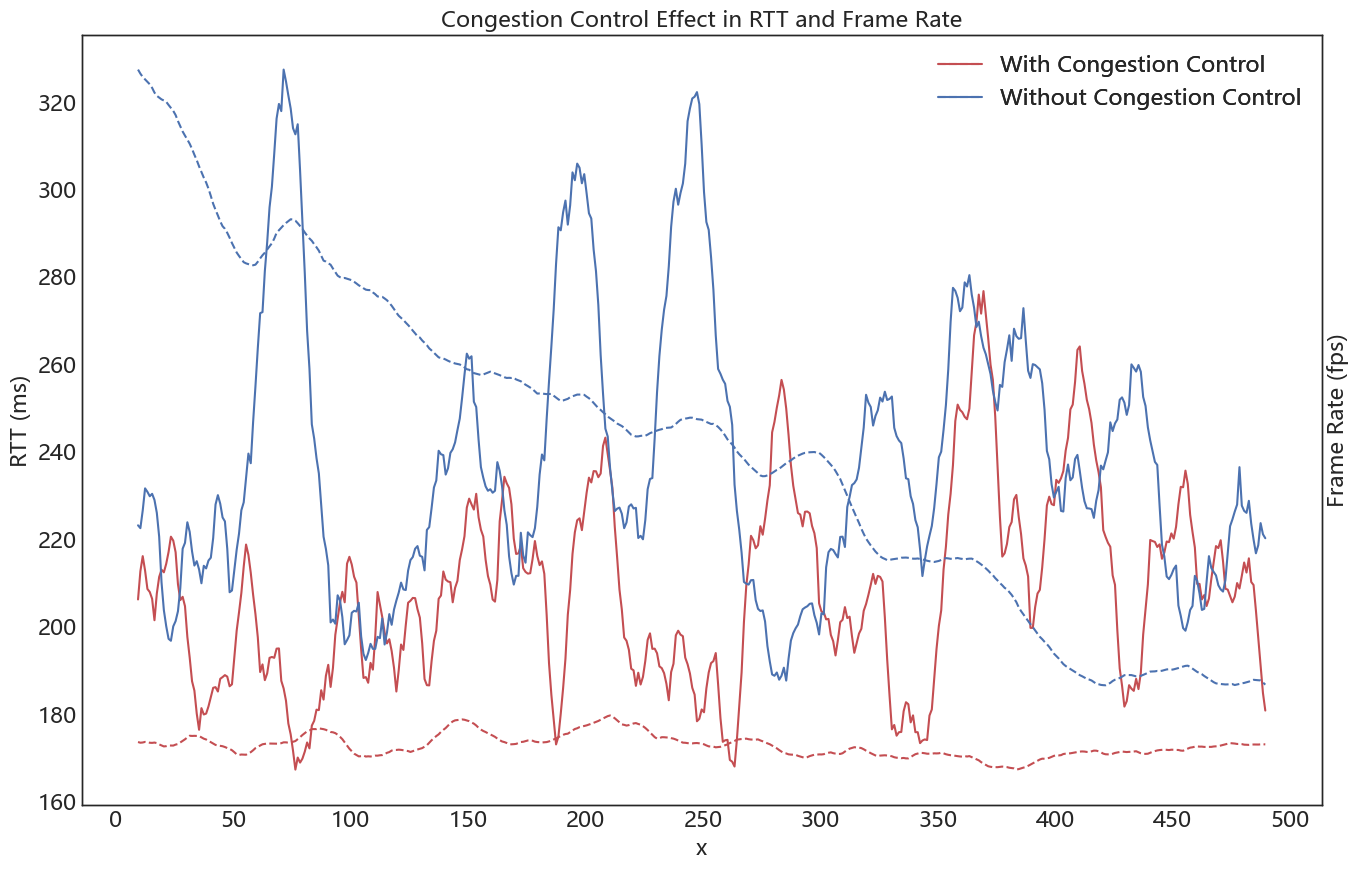

In [16]:
#我觉得并不可以画在一张图上面
x_idx= [i for i in range(500)]
df1 = pd.DataFrame({'x': x_idx ,
                    'Frame Rate (fps)': rtt_ccfr,
                    'RTT (ms)':rtt_cc,
                   })
df2 = pd.DataFrame({'x': x_idx,
                    'Frame Rate (fps)': rtt_fr,
                    'RTT (ms)':rtt,
                   })

# df1 = df1[(df1["Frame_Rate"] >= 15 )& (df1["Frame_Rate"] <= 20)]


# df2 = df2[(df2["Frame_Rate"] >= 15) & (df2["Frame_Rate"] <= 20)]

# df1 = df1[(df1["RTT"] >= 50 )& (df1["RTT"] <= 320)]
# df2 = df2[(df2["RTT"] >= 50) & (df2["RTT"] <= 320)]


df1 = df1.rolling(20).mean()
df2 = df2.rolling(20).mean()
ax1 = plt.subplot()
ax2 = ax1.twinx()
x_major_locator=MultipleLocator(50)
y_major_locator=MultipleLocator(50)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.title("Congestion Control Effect in RTT and Frame Rate")
sns.lineplot(data=df1, x='x', y="RTT (ms)",color="r",ax=ax1,label = 'With Congestion Control')
sns.lineplot(data=df1, x='x', y="Frame Rate (fps)",color="r",linestyle = '--', ax=ax2,label = 'With Congestion Control')
ax1.legend(loc=0)
sns.lineplot(data=df2, x='x', y="RTT (ms)",color="b", ax=ax1,label = 'Without Congestion Control')
sns.lineplot(data=df2, x='x',  y="Frame Rate (fps)",color="b", linestyle = '--',ax=ax2,label = 'Without Congestion Control')
ax2.legend(loc=1)
ax2.tick_params(axis='y')

In [17]:
decoder = [72, 33, 34, 22, 27, 40, 58, 101, 13, 394, 17, 85, 142, 35, 82, 105, 79, 39, 62, 84, 184, 18, 95, 171, 16, 22, 26, 98, 97, 31, 94, 30, 83, 71, 55, 28, 98, 61, 161, 36, 27, 102, 84, 16, 83, 143, 17, 74, 34, 151, 19, 154, 13, 47, 28, 27, 47, 26, 44, 70, 58, 33, 91, 220, 17, 10, 42, 59, 141, 57, 9, 114, 40, 66, 74, 43, 181, 33, 28, 22, 77, 27, 43, 219, 15, 23, 48, 55, 43, 71, 109, 121, 17, 134, 15, 23, 32, 92, 26, 93, 14, 128, 97, 36, 28, 25, 63, 28, 28, 29, 108, 28, 31, 44, 71, 37, 53, 125, 32, 46, 26, 102, 53, 33, 100, 28, 165, 30, 38, 25, 178, 37, 170, 35, 25, 25, 24, 55, 81, 119, 69, 140, 36, 56, 31, 25, 47, 159, 34, 26, 56, 56, 215, 37, 23, 57, 46, 36, 81, 50, 17, 160, 12, 7, 77, 47, 83, 79, 88, 89, 17, 138, 113, 148, 34, 52, 43, 44, 69, 28, 43, 64, 29, 50, 62, 31, 33, 80, 129, 51, 34, 27, 31, 27, 46, 56, 241, 35, 60, 58, 31, 26, 46, 99, 26, 72, 14, 119, 32, 86, 60, 58, 58, 58, 37, 47, 82, 249, 65, 27, 189, 68, 29, 105, 77, 50, 75, 46, 126, 130, 31, 65, 89, 36, 33, 24, 47, 31, 45, 54, 30, 95, 172, 29, 32, 39, 199, 15, 24, 45, 26, 69, 175, 31, 54, 32, 71, 104, 126, 50, 108, 113, 28, 27, 32, 32, 57, 50, 27, 67, 45, 64, 125, 31, 29, 75, 115, 28, 38, 122, 33, 115, 106, 31, 88, 29, 35, 61, 147, 33, 187, 193, 47, 88, 31, 28, 36, 31, 153, 67, 169, 125, 96, 208, 47, 180, 124, 29, 22, 24, 66, 228, 47, 242, 85, 211, 58, 165, 128, 152, 37, 150, 36, 34, 163, 252, 49, 55, 113, 195, 31, 315, 188, 43, 174, 85, 88, 31, 37, 78, 88, 31, 149, 62, 26, 28, 35, 163, 42, 28, 99, 144, 34, 81, 88, 87, 51, 79, 44, 64, 31, 69, 129, 177, 49, 145, 94, 30, 32, 53, 31, 47, 92, 56, 121, 111, 104, 32, 158, 29, 118, 110, 41, 55, 48, 49, 93, 32, 95, 103, 60, 109, 53, 66, 99, 122, 110, 31, 41, 10, 60, 73, 35, 63, 58, 30, 63, 74, 95, 29, 225, 33, 26, 221, 38, 47, 179, 35, 67, 37, 96, 26, 66, 31, 242, 17, 61, 30, 42, 159, 68, 105, 59, 39, 64, 68, 42, 32, 96, 185, 15, 21, 32, 185, 117, 65, 31, 48, 34, 111, 53, 34, 52, 135, 30, 96, 239, 123, 48, 39, 65, 114, 35, 50, 86, 33, 73, 117, 154, 33, 35, 62, 29, 75, 143, 96, 104, 41, 139, 32, 31, 79, 90, 130, 30, 73, 28, 82, 77, 35, 70, 88, 13, 113, 39, 48, 63, 224, 50, 79, 59, 113, 27, 35, 166, 56, 75, 69, 55, 50, 54, 33, 122, 15, 21, 28, 24, 101, 133, 80, 137, 32, 48, 146, 57, 36, 199, 34, 27, 28, 26, 63, 34, 84, 38, 134, 39, 35, 27, 227, 46, 162, 33, 81, 15, 56, 156, 35, 77, 53, 203, 33, 85, 60, 39, 161, 49, 27, 37, 75, 174, 36, 100, 45, 74, 29, 57, 49, 236, 16, 20, 27, 42, 108, 54, 162, 58, 69, 175, 32, 98, 15, 51, 61, 67, 40, 91, 61, 108, 58, 86, 104, 31, 30, 43, 174, 82, 71, 154, 32, 26, 58, 29, 46, 111, 205, 78, 67, 46, 53, 49, 29, 32, 115, 30, 25, 34, 56, 46, 77, 97, 182, 85, 106, 91, 92, 49, 175, 87, 30, 28, 110, 30, 121, 123, 29, 71, 28, 39, 157, 56, 127, 55, 134, 34, 29, 24, 76, 14, 163, 18, 48, 90, 100, 63, 61, 154, 33, 26, 68, 119, 89, 33, 33, 56, 26, 180, 125, 66, 101, 64, 105, 34, 95, 33, 120, 59, 56, 168, 29, 32, 81, 60, 50, 50, 67, 193, 54, 26, 154, 34, 47, 130, 64, 29, 119, 44, 70, 103, 60, 81, 160, 15, 22, 121, 55, 44, 81, 90, 48, 87, 110, 29, 26, 179, 126, 31, 28, 121, 32, 64, 142, 31, 29, 39, 131, 29, 32, 104, 148, 180, 27, 26, 36, 42, 73, 58, 114, 70, 127, 54, 43, 28, 83, 165, 85, 67, 187, 56, 40, 121, 67, 46, 60, 38, 76, 48, 42, 93, 61, 137, 32, 44, 35, 61, 73, 134, 59, 78, 113, 102, 37, 30, 98, 111, 106, 33, 29, 28, 168, 94, 33, 90, 75, 74, 70, 122, 33, 113, 32, 135, 30, 48, 36, 81, 48, 155, 102, 131, 196, 44, 61, 109, 109, 33, 217, 29, 30, 27, 28, 28, 31, 27, 25, 59, 218, 119, 32, 30, 222, 71, 27, 29, 98, 42, 106, 31, 26, 45, 201, 50, 27, 71, 27, 116, 111, 30, 28, 101, 44, 34, 26, 168, 101, 114, 47, 31, 156, 45, 179, 148, 33, 27, 61, 77, 32, 101, 30, 28, 82, 32, 88, 103, 29, 239, 17, 17, 50, 29, 55, 56, 42, 168, 14, 34, 181, 134, 54, 130, 31, 26, 50, 64, 32, 161, 38, 61, 45, 27, 55, 145, 110, 75, 201, 65, 55, 39, 97, 68, 29, 58, 85, 87, 218, 82, 67, 32, 27, 164, 33, 36, 29, 82, 46, 33, 105, 53, 80, 57, 102, 80, 65, 155, 125, 29, 27, 28, 112, 37, 51, 32, 152, 124, 34, 37, 88, 53, 92, 161, 35, 167, 114, 51, 65, 48, 69, 143, 33, 28, 56, 89, 31, 55, 160, 67, 70, 11, 84, 44, 80, 110, 31, 25, 49, 165, 33, 28, 123, 32, 30, 127, 76, 33, 39, 70, 67, 35, 88, 185, 102, 115, 75, 155, 36, 29, 24, 42, 100, 41, 35, 128, 59, 138, 114, 60, 81, 36, 101, 48, 13, 58, 168, 111, 59, 30, 37, 55, 94, 34, 155, 30, 164, 33, 81, 159, 32, 26, 46, 150, 32, 91, 12, 61, 37, 98, 104, 28, 68, 53, 57]

In [18]:
od = [61, 150, 168, 200, 221, 233, 228, 176, 213, 60, 110, 140, 62, 133, 106, 51, 58, 73, 55, 64, 65, 122, 69, 67, 102, 152, 195, 137, 167, 179, 176, 181, 144, 110, 130, 162, 110, 96, 83, 99, 120, 55, 72, 110, 50, 63, 107, 52, 91, 53, 83, 77, 126, 112, 145, 171, 177, 193, 193, 203, 200, 207, 162, 52, 82, 85, 68, 66, 75, 68, 90, 60, 89, 82, 64, 63, 59, 134, 154, 164, 130, 156, 161, 78, 130, 138, 131, 123, 153, 127, 67, 49, 115, 49, 81, 83, 109, 88, 123, 79, 120, 58, 69, 79, 107, 121, 81, 104, 139, 151, 110, 144, 155, 168, 141, 202, 189, 103, 127, 142, 179, 101, 94, 115, 66, 89, 89, 154, 172, 219, 74, 92, 54, 63, 63, 186, 201, 192, 146, 73, 51, 80, 110, 106, 130, 231, 224, 110, 126, 138, 125, 120, 59, 74, 107, 89, 118, 138, 107, 113, 162, 73, 154, 180, 120, 166, 141, 147, 110, 68, 107, 87, 53, 55, 83, 87, 135, 131, 95, 116, 110, 97, 133, 130, 122, 129, 154, 125, 85, 75, 104, 115, 128, 161, 159, 163, 90, 84, 102, 96, 124, 157, 163, 126, 144, 138, 171, 41, 63, 84, 83, 72, 70, 66, 64, 82, 81, 72, 61, 95, 66, 56, 104, 56, 52, 78, 92, 121, 60, 62, 97, 103, 59, 68, 126, 175, 156, 168, 169, 163, 204, 169, 52, 150, 165, 203, 50, 112, 124, 126, 148, 120, 68, 87, 80, 93, 50, 132, 51, 56, 43, 55, 86, 121, 124, 130, 165, 165, 236, 225, 235, 208, 138, 161, 188, 153, 88, 99, 127, 69, 95, 53, 38, 43, 66, 95, 94, 70, 47, 54, 48, 81, 96, 50, 146, 161, 174, 190, 75, 43, 51, 103, 57, 60, 55, 83, 55, 65, 90, 110, 87, 73, 88, 55, 97, 67, 50, 85, 50, 53, 62, 48, 71, 97, 84, 62, 60, 44, 52, 54, 60, 66, 56, 91, 58, 60, 65, 84, 95, 59, 61, 79, 62, 62, 79, 77, 80, 57, 69, 106, 40, 55, 125, 117, 96, 65, 65, 45, 60, 88, 119, 176, 110, 45, 37, 58, 36, 42, 57, 46, 91, 101, 32, 68, 56, 58, 70, 109, 59, 87, 46, 65, 74, 58, 54, 90, 43, 55, 69, 54, 52, 58, 77, 64, 75, 60, 59, 80, 98, 151, 110, 74, 119, 92, 84, 136, 126, 117, 60, 81, 57, 75, 107, 60, 140, 160, 97, 111, 91, 116, 53, 76, 48, 65, 71, 143, 112, 199, 221, 106, 111, 68, 61, 70, 81, 54, 52, 93, 60, 63, 91, 83, 91, 67, 75, 71, 103, 109, 146, 86, 145, 182, 183, 137, 175, 135, 69, 55, 58, 69, 50, 61, 69, 61, 70, 89, 67, 133, 64, 68, 120, 118, 177, 160, 67, 120, 64, 63, 87, 175, 202, 177, 151, 71, 99, 110, 124, 114, 77, 92, 105, 75, 128, 85, 106, 104, 126, 68, 60, 127, 129, 67, 100, 125, 66, 79, 48, 76, 99, 87, 86, 100, 53, 87, 144, 154, 171, 136, 48, 41, 53, 144, 141, 36, 50, 97, 69, 77, 112, 123, 140, 151, 168, 145, 174, 91, 82, 96, 115, 154, 162, 40, 55, 65, 108, 72, 67, 97, 84, 88, 67, 94, 55, 40, 46, 77, 95, 132, 163, 137, 53, 67, 115, 147, 185, 223, 278, 278, 114, 141, 95, 112, 125, 147, 128, 56, 42, 63, 66, 94, 64, 95, 186, 180, 161, 167, 121, 115, 66, 62, 79, 68, 108, 123, 154, 63, 51, 53, 61, 104, 122, 134, 178, 204, 158, 56, 48, 57, 58, 74, 85, 149, 155, 82, 143, 154, 164, 160, 164, 123, 107, 51, 61, 89, 48, 64, 64, 59, 48, 66, 110, 152, 244, 176, 115, 152, 141, 163, 165, 63, 63, 37, 46, 82, 113, 131, 150, 119, 153, 54, 98, 125, 105, 64, 146, 157, 69, 86, 106, 128, 55, 112, 122, 136, 122, 130, 80, 61, 38, 74, 70, 56, 102, 72, 99, 65, 56, 61, 57, 126, 151, 127, 109, 111, 131, 105, 79, 73, 96, 86, 104, 102, 78, 69, 84, 60, 94, 111, 66, 41, 79, 82, 136, 163, 92, 99, 136, 105, 86, 107, 112, 59, 115, 144, 85, 51, 100, 122, 46, 47, 52, 47, 65, 72, 104, 59, 65, 142, 75, 48, 62, 73, 98, 108, 132, 118, 120, 75, 57, 64, 82, 107, 138, 92, 78, 72, 66, 65, 53, 56, 82, 77, 92, 62, 81, 45, 41, 94, 45, 46, 74, 87, 98, 134, 113, 88, 55, 40, 87, 60, 75, 110, 139, 117, 67, 55, 65, 123, 166, 38, 75, 97, 47, 68, 68, 43, 51, 90, 56, 100, 61, 104, 105, 122, 201, 183, 68, 87, 68, 79, 96, 117, 86, 66, 88, 74, 100, 129, 158, 178, 192, 224, 244, 272, 276, 127, 67, 99, 134, 73, 45, 169, 196, 163, 165, 113, 130, 150, 201, 70, 59, 93, 78, 127, 92, 58, 76, 102, 133, 154, 183, 210, 103, 144, 91, 112, 164, 59, 71, 49, 63, 146, 171, 159, 125, 144, 86, 102, 124, 95, 145, 128, 85, 109, 60, 113, 131, 136, 168, 170, 178, 199, 121, 170, 193, 85, 50, 46, 47, 107, 144, 118, 97, 110, 93, 123, 122, 117, 132, 157, 68, 53, 66, 65, 37, 143, 179, 123, 105, 143, 109, 81, 65, 61, 72, 61, 73, 91, 45, 55, 66, 84, 44, 53, 75, 84, 89, 60, 58, 60, 58, 150, 46, 53, 67, 98, 158, 102, 131, 159, 186, 78, 71, 121, 157, 140, 132, 118, 61, 96, 53, 111, 127, 127, 167, 162, 60, 77, 138, 134, 96, 116, 109, 133, 126, 103, 150, 74, 91, 53, 71, 103, 138, 147, 62, 72, 92, 57, 73, 90, 84, 70, 78, 89, 84, 59, 90, 62, 60, 81, 51, 65, 71, 100, 160, 175, 185, 144, 164, 153, 99, 98, 54, 62, 80, 44, 78, 68, 78, 148, 112, 62, 41, 86, 125, 139, 125, 85, 139, 48, 73, 59, 77, 38, 56, 68, 84, 79, 68, 91, 40, 63, 103, 121, 62, 35, 49, 43]

In [19]:
len(decoder)

1030

In [20]:
len(od)

1028

<Figure size 1600x1000 with 0 Axes>

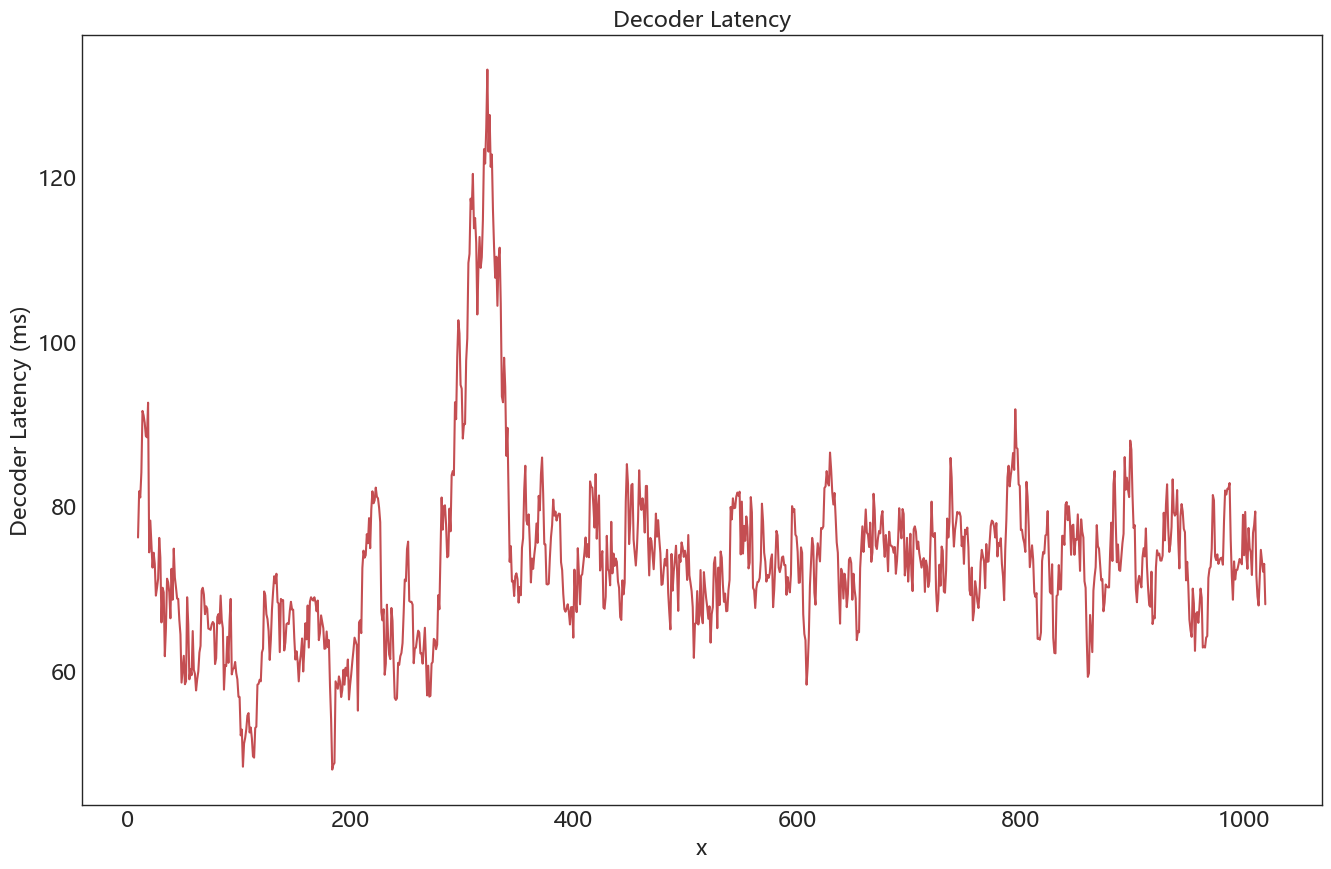

<Figure size 1600x1000 with 0 Axes>

In [21]:
decoder_idx= [i for i in range(len(decoder))]
df1 = pd.DataFrame({'x': decoder_idx ,
                    'Decoder Latency (ms)': decoder,
                   })
df1 = df1.rolling(20).mean()
plt.title("Decoder Latency")
sns.lineplot(data=df1, x="x", y="Decoder Latency (ms)",color="r")
plt.figure()

<Figure size 1600x1000 with 0 Axes>

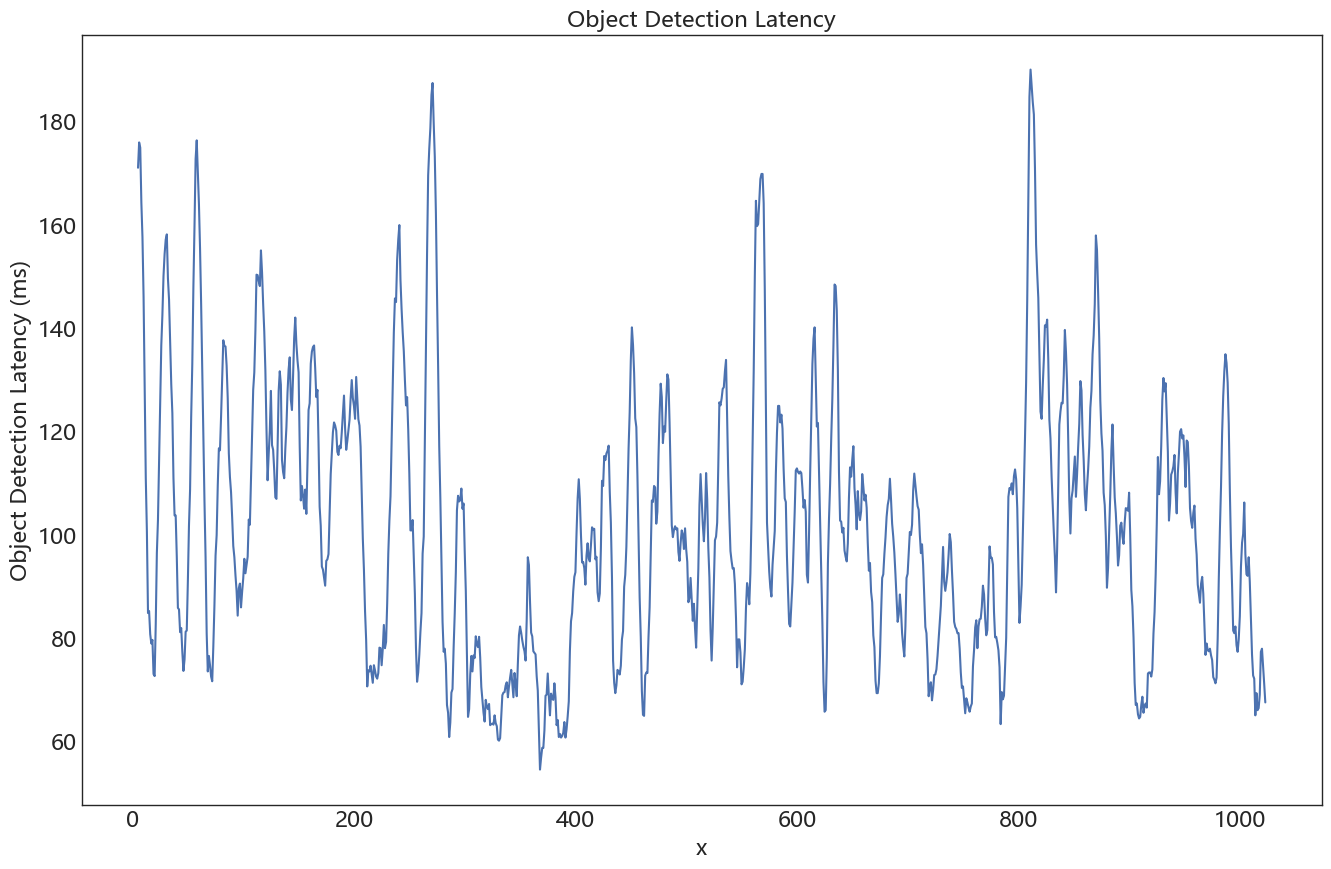

<Figure size 1600x1000 with 0 Axes>

In [22]:
od_idx= [i for i in range(len(od))]
df2 = pd.DataFrame({'x': od_idx ,
                    'Object Detection Latency (ms)': od,
                   })
df2 = df2.rolling(10).mean()
plt.title("Object Detection Latency")
sns.lineplot(data=df2, x="x", y="Object Detection Latency (ms)")
plt.figure()

In [23]:
encoder = [55, 12, 3, 10, 14, 8, 8, 10, 10, 8, 930, 8, 7, 11, 9, 14, 8, 9, 10, 10, 15, 10, 98, 13, 7, 13, 10, 12, 11, 11, 12, 10, 9, 11, 8, 11, 12, 13, 11, 51, 12, 67, 11, 11, 7, 12, 9, 7, 50, 66, 86, 7, 40, 14, 12, 29, 57, 38, 11, 13, 32, 8, 10, 12, 86, 10, 10, 333, 15, 11, 44, 12, 53, 18, 9, 36, 151, 22, 104, 9, 9, 36, 12, 10, 68, 11, 12, 12, 52, 8, 10, 10, 11, 59, 9, 97, 10, 13, 9, 38, 10, 8, 41, 12, 101, 55, 77, 13, 12, 7, 10, 15, 81, 9, 10, 11, 7, 9, 10, 13, 13, 13, 12, 11, 14, 9, 11, 10, 9, 8, 8, 6, 8, 19, 16, 12, 9, 8, 117, 10, 32, 10, 9, 11, 7, 90, 10, 9, 13, 11, 12, 8, 35, 8, 14, 17, 13, 40, 13, 12, 12, 9, 13, 8, 8, 7, 8, 11, 8, 11, 11, 14, 64, 11, 7, 10, 7, 9, 8, 11, 10, 10, 8, 8, 9, 9, 10, 11, 9, 10, 8, 10, 58, 11, 11, 10, 13, 8, 8, 10, 13, 11, 9, 13, 38, 16, 7, 11, 9, 9, 11, 10, 16, 126, 13, 11, 10, 10, 10, 34, 9, 7, 10, 8, 34, 12, 11, 7, 35, 7, 12, 11, 7, 37, 12, 8, 7, 8, 10, 8, 31, 7, 12, 10, 8, 46, 10, 13, 10, 9, 10, 8, 7, 10, 11, 11, 8, 7, 9, 12, 7, 12, 8, 10, 9, 9, 8, 8, 9, 10, 11, 11, 7, 8, 7, 21, 10, 10, 9, 10, 9, 8, 9, 45, 9, 28, 9, 8, 8, 8, 12, 10, 11, 10, 9, 12, 7, 10, 10, 11, 7, 13, 7, 12, 6, 7, 7, 13, 10, 10, 6, 8, 9, 7, 32, 8, 11, 12, 7, 8, 8, 7, 9, 8, 7, 13, 9, 8, 8, 9, 9, 6, 8, 7, 9, 8, 8, 8, 12, 12, 13, 9, 10, 7, 7, 7, 8, 10, 9, 111, 10, 7, 9, 9, 8, 8, 8, 7, 7, 7, 11, 7, 12, 8, 8, 10, 9, 6, 9, 8, 11, 7, 8, 6, 9, 11, 11, 10, 7, 11, 7, 7, 10, 10, 11, 9, 10, 7, 8, 10, 7, 10, 9, 7, 7, 11, 28, 9, 8, 7, 7, 8, 11, 7, 8, 9, 7, 7, 8, 8, 6, 7, 8, 12, 6, 10, 10, 9, 13, 8, 11, 7, 10, 6, 7, 13, 10, 7, 7, 8, 14, 9, 6, 10, 7, 39, 11, 9, 9, 7, 11, 8, 13, 8, 14, 9, 9, 6, 7, 8, 10, 9, 10, 10, 9, 8, 9, 6, 11, 12, 7, 8, 7, 8, 10, 7, 10, 7, 8, 8, 9, 9, 6, 9, 7, 8, 10, 10, 10, 8, 7, 8, 12, 9, 9, 7, 11, 9, 10, 9, 29, 13, 9, 8, 8, 10, 11, 7, 7, 9, 7, 11, 10, 8, 15, 8, 8, 7, 9, 7, 12, 12, 8, 7, 8, 38, 8, 7, 8, 14, 6, 12, 6, 8, 7, 13, 54, 6, 68, 11, 8, 6, 8, 6, 12, 10, 10, 9, 8, 36, 10, 8, 11, 6, 11, 9, 9, 10, 12, 13, 9, 12, 9, 9, 9, 10, 7, 6, 9, 8, 8, 8, 8, 8, 12, 6, 8, 10, 11, 8, 8, 9, 8, 7, 8, 9, 6, 11, 9, 6, 11, 94, 9, 8, 10, 8, 7, 13, 25, 11, 8, 7, 8, 10, 11, 10, 7, 7, 8, 12, 12, 7, 12, 8, 8, 8, 6, 12, 13, 7, 7, 10, 10, 7, 10, 8, 6, 9, 7, 7, 8, 7, 32, 7, 17, 9, 10, 7, 9, 7, 9, 8, 7, 13, 10, 9, 7, 7, 8, 12, 7, 10, 10, 7, 13, 10, 10, 28, 12, 8, 8, 9, 8, 8, 11, 10, 11, 13, 10, 6, 11, 7, 12, 9, 15, 8, 9, 9, 7, 7, 6, 6, 8, 11, 7, 71, 10, 11, 7, 9, 6, 10, 11, 8, 7, 8, 10, 8, 9, 11, 9, 9, 10, 7, 8, 9, 7, 10, 12, 7, 9, 7, 8, 8, 7, 7, 10, 11, 7, 8, 8, 9, 8, 11, 6, 11, 11, 8, 9, 10, 7, 10, 11, 10, 6, 6, 12, 33, 9, 7, 6, 54, 6, 8, 14, 12, 9, 9, 11, 13, 12, 7, 11, 16, 31, 7, 11, 7, 8, 8, 8, 9, 7, 7, 7, 10, 7, 9, 7, 13, 9, 10, 8, 8, 11, 9, 7, 12, 6, 11, 8, 7, 7, 10, 11, 7, 10, 6, 8, 7, 9, 12, 9, 6, 11, 6, 7, 9, 8, 9, 7, 7, 9, 9, 12, 10, 8, 11, 11, 7, 7, 11, 6, 8, 8, 9, 11, 8, 6, 8, 7, 7, 8, 9, 9, 7, 10, 8, 10, 7, 10, 6, 9, 13, 8, 7, 89, 10, 7, 9, 8, 8, 7, 9, 6, 9, 10, 7, 9, 7, 9, 6, 11, 9, 7, 10, 8, 9, 9, 7, 11, 9, 14, 8, 8, 13, 6, 7, 8, 7, 11, 6, 10, 7, 10, 7, 31, 8, 10, 6, 10, 10, 9, 6, 6, 7, 8, 9, 6, 12, 6, 9, 13, 12, 13, 10, 7, 7, 11, 7, 8, 8, 7, 9, 11, 10, 10, 7, 10, 10, 15, 8, 7, 7, 8, 10, 12, 6, 13, 7, 9, 8, 10, 7, 10, 9, 12, 6, 9, 6, 10, 7, 7, 120, 7, 6, 9, 12, 7, 102, 9, 38, 12, 12, 12, 6, 7, 8, 6, 7, 8, 10, 9, 7, 8, 11, 11, 8, 6, 8, 7, 10, 10, 8, 7, 8, 12, 10, 8, 10, 11, 26, 8, 7, 14, 6, 7, 8, 7, 10, 7, 7, 7, 12, 7, 12, 6, 11, 13, 9, 8, 8, 8, 8, 8, 12, 9, 9, 9, 8, 11, 12, 10, 6, 9, 6, 8, 13, 10, 30, 12, 69, 8, 7, 9, 11, 7, 109, 8, 7, 12, 8, 9, 10, 7, 43, 7, 9, 9, 7, 7, 9, 7, 6, 10, 10, 7, 11, 7, 8, 11, 7, 7, 8, 8, 10, 9, 10, 12, 7, 10, 7, 7, 93, 9, 64, 7, 7, 7, 7, 14, 9, 12, 11, 56, 7, 7, 12, 34, 10, 11, 11, 12, 7, 10, 33, 7, 10, 73, 11, 10, 63, 8, 7, 10, 7, 9, 12, 11, 10, 9, 10, 8, 9, 12, 10, 8, 11, 9, 8, 13, 7, 8]

<Figure size 1600x1000 with 0 Axes>

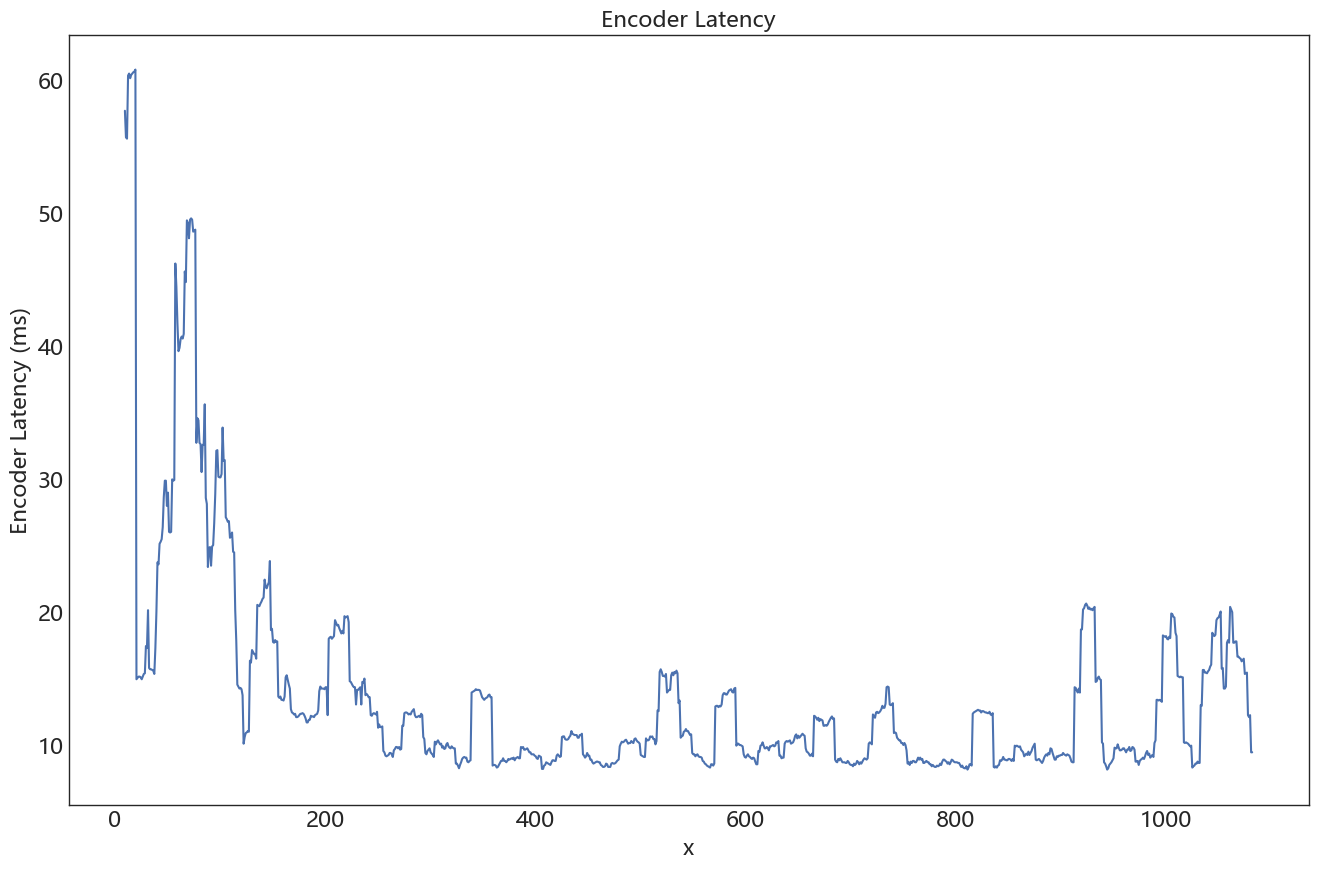

<Figure size 1600x1000 with 0 Axes>

In [28]:
encoder_idx= [i for i in range(len(encoder))]
df3 = pd.DataFrame({'x': encoder_idx ,
                    'Encoder Latency (ms)': encoder,
                   })
# df3 = df3[(df3["Encoder Latency (ms)"]<= 40)]
df3 = df3.rolling(20).mean()
plt.title("Encoder Latency")
sns.lineplot(data=df3, x="x", y="Encoder Latency (ms)")
plt.figure()

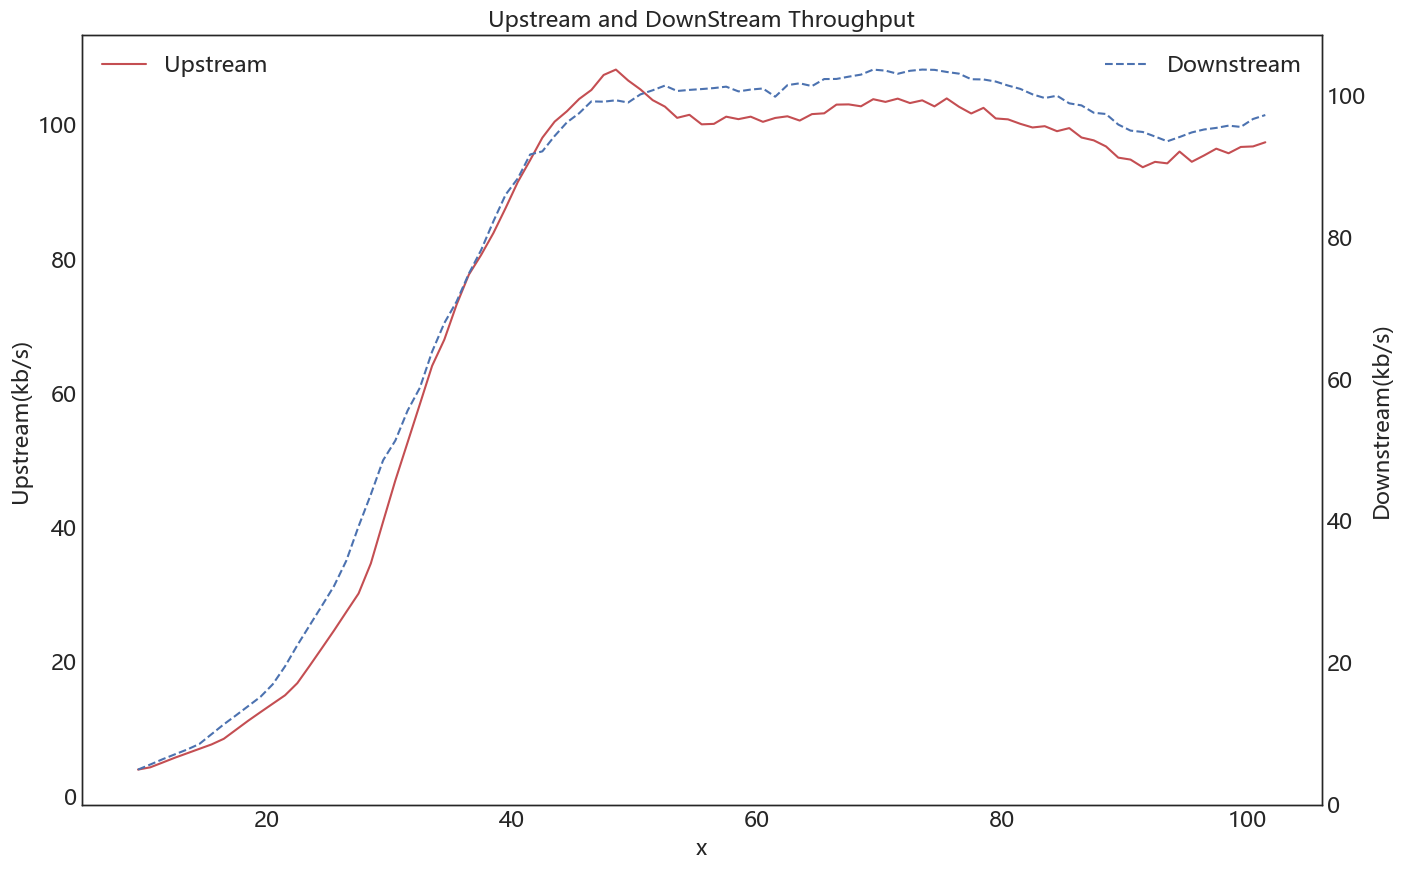

In [25]:
all2 = pd.read_csv('./TPResults[2].txt',sep=', ',encoding='GB2312',engine='python')

#我觉得并不可以画在一张图上面
x_idx= [i for i in range(112)]
df4 = pd.DataFrame({'x': x_idx ,
                    'Upstream(kb/s)':all2["Upstream(kb/s)"],
                    'Downstream(kb/s)':all2["Downstream(kb/s)"],
                   })

df4 = df4.rolling(20).mean()
# df2 = df2.rolling(20).mean()
ax1 = plt.subplot()
ax2 = ax1.twinx()

plt.title("Upstream and DownStream Throughput")
sns.lineplot(data=df4, x='x', y="Upstream(kb/s)",color="r",ax=ax1,label = 'Upstream')
ax1.legend(loc=2)
sns.lineplot(data=df4, x='x', y="Downstream(kb/s)",color="b", linestyle = '--',ax=ax2,label = 'Downstream')
ax2.legend(loc=0)
ax2.tick_params(axis='y')


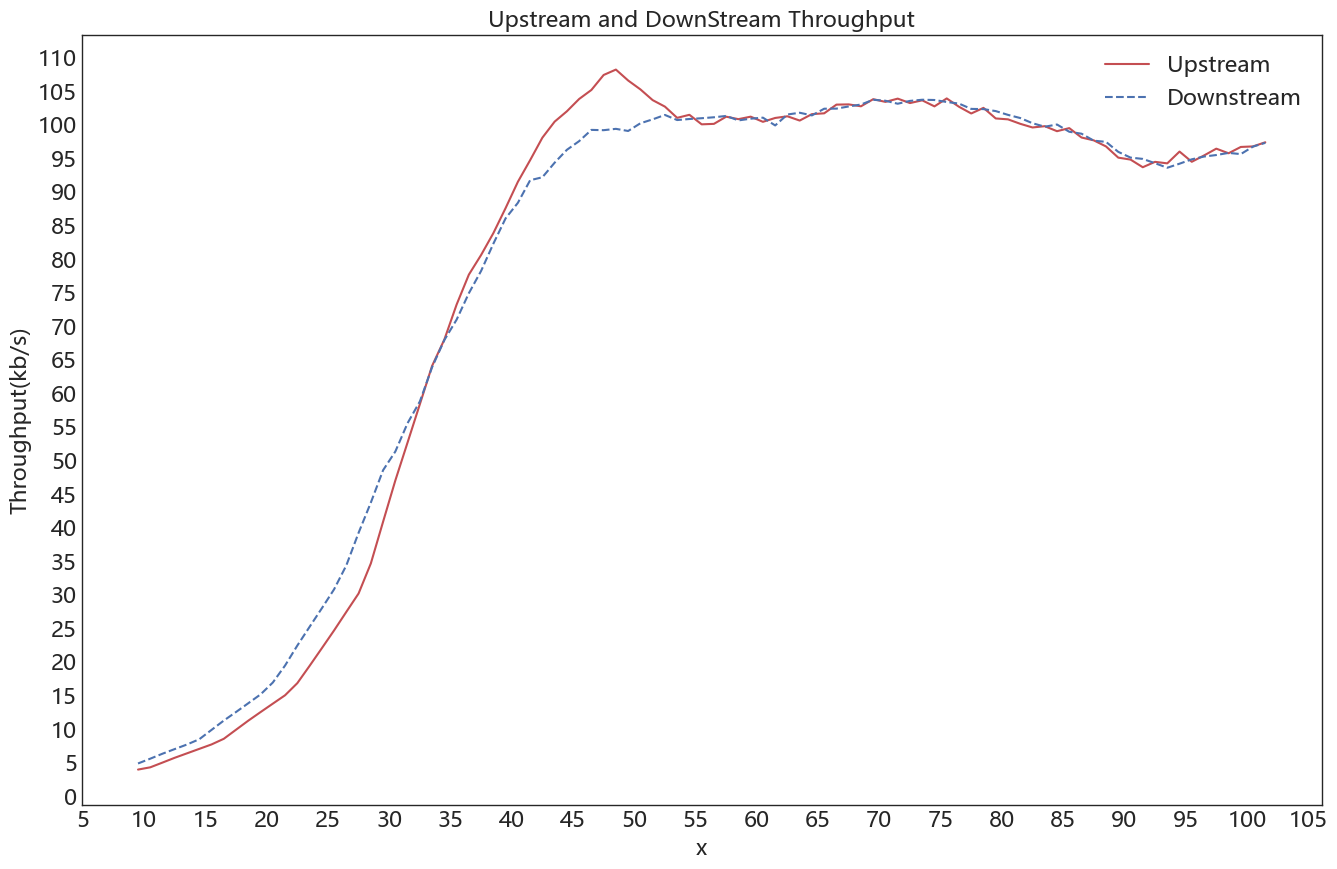

In [26]:

all2 = pd.read_csv('./TPResults[2].txt',sep=', ',encoding='GB2312',engine='python')

#我觉得并不可以画在一张图上面
x_idx= [i for i in range(112)]
df4 = pd.DataFrame({'x': x_idx ,
                    'Throughput(kb/s)':all2["Upstream(kb/s)"],
                    'Downstream(kb/s)':all2["Downstream(kb/s)"],
                   })

df4 = df4.rolling(20).mean()
# df2 = df2.rolling(20).mean()

x_major_locator=MultipleLocator(5)
y_major_locator=MultipleLocator(5)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)
plt.title("Upstream and DownStream Throughput")
sns.lineplot(data=df4, x='x', y="Throughput(kb/s)",color="r",label = 'Upstream')
ax1.legend(loc=2)
sns.lineplot(data=df4, x='x', y="Downstream(kb/s)",color="b",linestyle = '--',label = 'Downstream')
ax2.legend(loc=0)
ax2.tick_params(axis='y')
